In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random as rd
import data_analytics.zip_file as zip_file
from data_analytics.graphs import display_caption
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from copy import deepcopy
from tqdm import tqdm
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
shortlist_coutries = ['Argentina', 'Brazil', 'Canada', 
       'France', 'Germany', 'Ireland', 'Italy', 
       'Mexico', 'Spain',  
       'United Kingdom of Great Britain and Northern Ireland','United States of America']

continents = ['Africa', 'Americas', 'Asia',
      'Europe', 'Oceania']

cont_region = ['Eastern Africa',
       'Middle Africa', 'Northern Africa', 'Southern Africa',
       'Western Africa', 'Northern America',
       'Central America', 'Caribbean', 'South America', 
       'Central Asia', 'Eastern Asia', 'Southern Asia',
       'South-eastern Asia', 'Western Asia', 'Eastern Europe',
       'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania']

# Value of Production

In [4]:
vp_beef = ['Meat, cattle']

In [38]:
filepath = './../temp/value-of-production.csv'
zip_filepath = './../assets/value-of-production.zip'
temp_directory= './../temp'
zip_file.unzip_required_asset(filepath, zip_filepath, temp_directory)

vp = pd.read_csv(filepath, encoding='latin1')
vp = vp.drop(['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Flag'], axis=1)
vp = vp.loc[vp.Area.isin(shortlist_coutries)]
vp = vp.loc[vp.Item.isin(vp_beef)]
vp = vp.sort_values(by=["Area","Item", "Year"])
vp.reset_index(inplace=True,drop=True)
vp

#SLC standing for Standard Local Currency will require conversion.

Area          Item  \
0                    Argentina  Meat, cattle   
1                    Argentina  Meat, cattle   
2                    Argentina  Meat, cattle   
3                    Argentina  Meat, cattle   
4                    Argentina  Meat, cattle   
...                        ...           ...   
1911  United States of America  Meat, cattle   
1912  United States of America  Meat, cattle   
1913  United States of America  Meat, cattle   
1914  United States of America  Meat, cattle   
1915  United States of America  Meat, cattle   

                                                Element  Year      Unit  \
0     Gross Production Value (constant 2014-2016 tho...  1961  1000 SLC   
1     Gross Production Value (constant 2014-2016 tho...  1961  1000 US$   
2     Gross Production Value (constant 2014-2016 tho...  1962  1000 SLC   
3     Gross Production Value (constant 2014-2016 tho...  1962  1000 US$   
4     Gross Production Value (constant 2014-2016 tho...  1963  1000 SLC   
...                                                 ...   ...       ...   
1911  Gross Production Value (constant 2014-2016 tho...  2018  1000 SLC   
1912      Gross Production Value (current thousand US$)  2018  1000 US$   
1913  Gross Production Value (constant 2014-2016 tho...  2018  1000 US$   
1914  Gross Production Value (constant 2014-2016 tho...  2019  1000 SLC   
1915  Gross Production Value (constant 2014-2016 tho...  2019  1000 US$   

            Value  
0     114892238.0  
1      10525723.0  
2     127412815.0  
3      11672782.0  
4     139542342.0  
...           ...  
1911   66012248.0  
1912   54343317.0  
1913   66012248.0  
1914   66712100.0  
1915   66712100.0  

[1916 rows x 6 columns]

# Trade:
Imports by Value and Quantity & Exports by Value and Quantity

In [6]:
trade_cl_beef = ['Meat, cattle']

In [7]:
filepath = './../temp/trade-crops-livestock.csv'
zip_filepath = './../assets/trade-crops-livestock/'
temp_directory= './../temp'
zip_file.unzip_required_asset(filepath, zip_filepath, temp_directory)

trade_cl = pd.read_csv(filepath,encoding="latin1")

#trade_cl = trade_cl.loc[trade_cl.Year >= 1990]
trade_cl = trade_cl.drop(['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Flag'], axis=1)
trade_cl = trade_cl.loc[trade_cl.Area.isin(shortlist_coutries)]
trade_cl = trade_cl.loc[trade_cl.Item.isin(trade_cl_beef)]
trade_cl = trade_cl.sort_values(by=["Area","Item", "Year"])
trade_cl.reset_index(inplace=True,drop=True)
trade_cl

Area          Item          Element  Year      Unit  \
0                    Argentina  Meat, cattle  Import Quantity  1961    tonnes   
1                    Argentina  Meat, cattle     Import Value  1961  1000 US$   
2                    Argentina  Meat, cattle  Export Quantity  1961    tonnes   
3                    Argentina  Meat, cattle     Export Value  1961  1000 US$   
4                    Argentina  Meat, cattle  Import Quantity  1962    tonnes   
...                        ...           ...              ...   ...       ...   
2629  United States of America  Meat, cattle     Export Value  2019  1000 US$   
2630  United States of America  Meat, cattle  Import Quantity  2020    tonnes   
2631  United States of America  Meat, cattle     Import Value  2020  1000 US$   
2632  United States of America  Meat, cattle  Export Quantity  2020    tonnes   
2633  United States of America  Meat, cattle     Export Value  2020  1000 US$   

          Value  
0           0.0  
1           0.0  
2      271086.0  
3      112971.0  
4           0.0  
...         ...  
2629  1023675.0  
2630   125604.0  
2631   772561.0  
2632   121093.0  
2633   806551.0  

[2634 rows x 6 columns]

In [8]:
trade_cl_quantity = trade_cl.loc[(trade_cl.Element == "Export Quantity")|(trade_cl.Element == "Import Quantity")]
trade_cl_value = trade_cl.loc[(trade_cl.Element == "Export Value")|(trade_cl.Element == "Import Value")]
trade_cl_quantity.reset_index(inplace=True,drop=True)
trade_cl_value.reset_index(inplace=True,drop=True)

In [9]:
years = range(1961,2021) #Year to analyse

In [10]:
#Creation of missing years to quantity
for c in trade_cl_quantity.Area.unique():
  country = trade_cl_quantity.loc[trade_cl_quantity.Area == c]
  country.reset_index(inplace=True,drop=True)
  for item in country.Item.unique():
    for year in years:
      country_fitered = country.loc[(country.Year == year) & (country.Item == item)]
      country_filt_import = country_fitered.loc[country_fitered.Element == "Import Quantity"]
      country_filt_import.reset_index(inplace=True,drop=True)
      if len(country_filt_import) < 1:
        series = country.loc[0]
        series["Item"] = item
        series["Element"] = "Import Quantity"
        series["Year"] = year
        series["Value"] = np.nan
        trade_cl_quantity=trade_cl_quantity.append(series)
      
      country_filt_export = country_fitered.loc[country_fitered.Element == "Export Quantity"]
      country_filt_export.reset_index(inplace=True,drop=True)
      if len(country_filt_export) < 1:
        series = country.loc[0]
        series["Item"] = item
        series["Element"] = "Export Quantity"
        series["Year"] = year
        series["Value"] = np.nan
        trade_cl_quantity=trade_cl_quantity.append(series)

In [11]:
for c in trade_cl_quantity.Area.unique():
  total = trade_cl_quantity.loc[trade_cl_quantity.Area == c].shape[0]
  n = trade_cl_quantity.loc[(trade_cl_quantity.Value.isnull()) & (trade_cl_quantity.Area == c)]
  nulls = n.shape[0]
  print("Percentage total of null for country {0} is {1}".format(c,round((nulls/total)*100,2)))
  print("\nMissing items:",n.Item.value_counts())
  print("\n\n")


Percentage total of null for country Argentina is 2.5

Missing items: Meat, cattle    3
Name: Item, dtype: int64



Percentage total of null for country Brazil is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Canada is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country France is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Germany is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Ireland is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Italy is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Mexico is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Spain is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for

In [12]:
#Creation of missing years to Value
for c in trade_cl_value.Area.unique():
  country = trade_cl_value.loc[trade_cl_value.Area == c] #Filter by country
  country.reset_index(inplace=True,drop=True) #Reset Index
  for item in country.Item.unique():
    for year in years:
      country_fitered = country.loc[(country.Year == year) & (country.Item == item)]
      country_filt_import = country_fitered.loc[country_fitered.Element == "Import Value"]
      country_filt_import.reset_index(inplace=True,drop=True)
      if len(country_filt_import) < 1:
        series = country.loc[0]
        series["Item"] = item
        series["Element"] = "Import Value"
        series["Year"] = year
        series["Value"] = np.nan
        trade_cl_value=trade_cl_value.append(series)
      
      country_filt_export = country_fitered.loc[country_fitered.Element == "Export Value"]
      country_filt_export.reset_index(inplace=True,drop=True)
      if len(country_filt_export) < 1:
        series = country.loc[0]
        series["Item"] = item
        series["Element"] = "Export Value"
        series["Year"] = year
        series["Value"] = np.nan
        trade_cl_value=trade_cl_value.append(series)


In [13]:
for c in trade_cl_value.Area.unique():
  total = trade_cl_value.loc[trade_cl_value.Area == c].shape[0]
  n = trade_cl_value.loc[(trade_cl_value.Value.isnull()) & (trade_cl_value.Area == c)]
  nulls = n.shape[0]
  print("Percentage total of null for country {0} is {1}".format(c,round((nulls/total)*100,2)))
  print("\nMissing items:",n.Item.value_counts())
  print("\n\n")

Percentage total of null for country Argentina is 2.5

Missing items: Meat, cattle    3
Name: Item, dtype: int64



Percentage total of null for country Brazil is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Canada is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country France is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Germany is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Ireland is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Italy is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Mexico is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for country Spain is 0.0

Missing items: Series([], Name: Item, dtype: int64)



Percentage total of null for

In [14]:
trade_cl_qt_filled = pd.DataFrame(columns=trade_cl_quantity.columns)
for c in trade_cl_quantity.Area.unique():
  for item in trade_cl_quantity.Item.unique():
    for element in trade_cl_quantity.Element.unique():
      country = trade_cl_quantity.loc[(trade_cl_quantity.Area == c)&(trade_cl_quantity.Item == item)& (trade_cl_quantity.Element == element )]
      country = country.sort_values(by="Year")#.interpolate()
      mean = round(country.Value.mean()) #Fill with mean
      country = country.fillna(mean)
      trade_cl_qt_filled = trade_cl_qt_filled.append(country)
      trade_cl_qt_filled.reset_index(drop=True,inplace=True)



In [15]:
trade_cl_vl_filled = pd.DataFrame(columns=trade_cl_value.columns)
for c in trade_cl_value.Area.unique():
    for item in trade_cl_value.Item.unique():
        for element in trade_cl_value.Element.unique():
            country = trade_cl_value.loc[(trade_cl_value.Area == c)
                                         & (trade_cl_value.Item == item) &
                                         (trade_cl_value.Element == element)]
            country = country.sort_values(by="Year")  #.interpolate()
            mean = round(country.Value.mean())  #Fill with mean
            country = country.fillna(mean)
            trade_cl_vl_filled = trade_cl_vl_filled.append(country)
            trade_cl_vl_filled.reset_index(drop=True, inplace=True)

In [16]:
"""population = pd.read_excel("Population Sample Data.xlsx")
population.columns = ["COUNTRY","POPULATION NO.","POP per 1000"]
dic = {}
for i in range(len(population)):
  dic.update({
      population.COUNTRY[i]:population["POPULATION NO."][i]
  })
dic"""

'population = pd.read_excel("Population Sample Data.xlsx")\npopulation.columns = ["COUNTRY","POPULATION NO.","POP per 1000"]\ndic = {}\nfor i in range(len(population)):\n  dic.update({\n      population.COUNTRY[i]:population["POPULATION NO."][i]\n  })\ndic'

In [17]:
#Value in dolars
trade_cl_vl_filled["Total_value"] = trade_cl_vl_filled.Value * 1000
#trade_cl_vl_filled.tail()

"""#Add population
pop = []
for i in range(len(trade_cl_vl_filled)):
  pop.append(int(dic[trade_cl_vl_filled.Area[i]].replace(",","")))
trade_cl_vl_filled["Population"] = pop

#Calculate Per Capita
trade_cl_vl_filled["Per Capita"] = trade_cl_vl_filled.Total_value / trade_cl_vl_filled.Population
trade_cl_vl_filled["Per Capita"] = trade_cl_vl_filled["Per Capita"].round(3)"""

'#Add population\npop = []\nfor i in range(len(trade_cl_vl_filled)):\n  pop.append(int(dic[trade_cl_vl_filled.Area[i]].replace(",","")))\ntrade_cl_vl_filled["Population"] = pop\n\n#Calculate Per Capita\ntrade_cl_vl_filled["Per Capita"] = trade_cl_vl_filled.Total_value / trade_cl_vl_filled.Population\ntrade_cl_vl_filled["Per Capita"] = trade_cl_vl_filled["Per Capita"].round(3)'

In [18]:
"""for element in trade_cl_vl_filled.Element.unique():
  for item in trade_cl_vl_filled.Item.unique():
    #Filter by Trade Type and Product Type
    imp = trade_cl_vl_filled.loc[(trade_cl_vl_filled.Element == element)&(trade_cl_vl_filled.Item == item)]
    imp.reset_index(inplace=True,drop=True)
    sns.set(rc = {'figure.figsize':(25,12)}) #Set figure size

    #Plot
    sns.lineplot(x='Year', y='Per Capita',hue="Area",
                data=imp[["Area","Year","Per Capita"]], color="red" ).set_title("{0} -  {1}".format(element,item)) #Plot
    plt.show()"""

'for element in trade_cl_vl_filled.Element.unique():\n  for item in trade_cl_vl_filled.Item.unique():\n    #Filter by Trade Type and Product Type\n    imp = trade_cl_vl_filled.loc[(trade_cl_vl_filled.Element == element)&(trade_cl_vl_filled.Item == item)]\n    imp.reset_index(inplace=True,drop=True)\n    sns.set(rc = {\'figure.figsize\':(25,12)}) #Set figure size\n\n    #Plot\n    sns.lineplot(x=\'Year\', y=\'Per Capita\',hue="Area",\n                data=imp[["Area","Year","Per Capita"]], color="red" ).set_title("{0} -  {1}".format(element,item)) #Plot\n    plt.show()'

In [19]:
#Value in dolars
trade_cl_qt_filled["Total_value"] = trade_cl_qt_filled.Value * 1000
#trade_cl_qt_filled.tail()

"""#Add population
pop = []
for i in range(len(trade_cl_qt_filled)):
  pop.append(int(dic[trade_cl_qt_filled.Area[i]].replace(",","")))
trade_cl_qt_filled["Population"] = pop

#Calculate Per Capita
trade_cl_qt_filled["Per Capita"] = trade_cl_qt_filled.Total_value / trade_cl_qt_filled.Population
trade_cl_qt_filled["Per Capita"] = trade_cl_qt_filled["Per Capita"].round(3)
trade_cl_qt_filled.head()"""

'#Add population\npop = []\nfor i in range(len(trade_cl_qt_filled)):\n  pop.append(int(dic[trade_cl_qt_filled.Area[i]].replace(",","")))\ntrade_cl_qt_filled["Population"] = pop\n\n#Calculate Per Capita\ntrade_cl_qt_filled["Per Capita"] = trade_cl_qt_filled.Total_value / trade_cl_qt_filled.Population\ntrade_cl_qt_filled["Per Capita"] = trade_cl_qt_filled["Per Capita"].round(3)\ntrade_cl_qt_filled.head()'

In [20]:
"""for element in trade_cl_qt_filled.Element.unique():
  for item in trade_cl_qt_filled.Item.unique():
    #Filter by Trade Type and Product Type
    imp = trade_cl_qt_filled.loc[(trade_cl_qt_filled.Element == element)&(trade_cl_qt_filled.Item == item)]
    imp.reset_index(inplace=True,drop=True)
    sns.set(rc = {'figure.figsize':(25,12)}) #Set figure size

    #Plot
    sns.lineplot(x='Year', y='Per Capita',hue="Area",
                data=imp[["Area","Year","Per Capita"]], color="red" ).set_title("{0} -  {1}".format(element,item)) #Plot
    plt.show()"""

'for element in trade_cl_qt_filled.Element.unique():\n  for item in trade_cl_qt_filled.Item.unique():\n    #Filter by Trade Type and Product Type\n    imp = trade_cl_qt_filled.loc[(trade_cl_qt_filled.Element == element)&(trade_cl_qt_filled.Item == item)]\n    imp.reset_index(inplace=True,drop=True)\n    sns.set(rc = {\'figure.figsize\':(25,12)}) #Set figure size\n\n    #Plot\n    sns.lineplot(x=\'Year\', y=\'Per Capita\',hue="Area",\n                data=imp[["Area","Year","Per Capita"]], color="red" ).set_title("{0} -  {1}".format(element,item)) #Plot\n    plt.show()'

In [21]:
'''def plot(df,region,meat_type="Meat, Cattle"):
  df = df.loc[df.Area == region]
  df.reset_index(inplace=True,drop=True)
  sns.set(rc = {'figure.figsize':(25,12)}) #Set figure size
  for element in df.Element.unique():
    sns.lineplot(x='Year', y='1000 Tonnes', data=df[["Year","1000 Tonnes"]]).set_title("Region: {0} - Trade: {1} (Thousand Tonnes).".format(region,meat_type)) #Plot
  plt.savefig("images/"+ region +'.png')
  plt.show()

for region in sua_filled_df.Area.unique():
  plot(sua_filled_df,region)'''

  #Distribution of Elements by Year by Region by item

'def plot(df,region,meat_type="Meat, Cattle"):\n  df = df.loc[df.Area == region]\n  df.reset_index(inplace=True,drop=True)\n  sns.set(rc = {\'figure.figsize\':(25,12)}) #Set figure size\n  for element in df.Element.unique():\n    sns.lineplot(x=\'Year\', y=\'1000 Tonnes\', data=df[["Year","1000 Tonnes"]]).set_title("Region: {0} - Trade: {1} (Thousand Tonnes).".format(region,meat_type)) #Plot\n  plt.savefig("images/"+ region +\'.png\')\n  plt.show()\n\nfor region in sua_filled_df.Area.unique():\n  plot(sua_filled_df,region)'

# Land Use

In [22]:
land_use_item = ['Agriculture']


filepath = './../temp/inputs-land-use-e-all-data.csv'
zip_filepath = './../assets/inputs-land-use-e-all-data.zip'
temp_directory= './../temp'
zip_file.unzip_required_asset(filepath, zip_filepath, temp_directory)

land_use = pd.read_csv(filepath, encoding='latin1')
land_use = land_use.loc[land_use.Item.isin(land_use_item)]
land_use = land_use.loc[land_use.Area.isin(shortlist_coutries)]
land_use = land_use.drop(['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Flag'], axis=1)
land_use.reset_index(inplace=True,drop=True)
land_use

Area         Item Element  Year     Unit        Value
0                   Argentina  Agriculture    Area  1961  1000 ha  137829.0000
1                   Argentina  Agriculture    Area  1962  1000 ha  136434.0000
2                   Argentina  Agriculture    Area  1963  1000 ha  134875.0000
3                   Argentina  Agriculture    Area  1964  1000 ha  133297.0000
4                   Argentina  Agriculture    Area  1965  1000 ha  131780.0000
..                        ...          ...     ...   ...      ...          ...
644  United States of America  Agriculture    Area  2015  1000 ha  404718.7000
645  United States of America  Agriculture    Area  2016  1000 ha  405264.6000
646  United States of America  Agriculture    Area  2017  1000 ha  405810.3538
647  United States of America  Agriculture    Area  2018  1000 ha  405810.3538
648  United States of America  Agriculture    Area  2019  1000 ha  405810.3538

[649 rows x 6 columns]

# Production

In [23]:
prod_item = ['Meat, cattle']

filepath = './../temp/production-crops-livestock-e-all-data.csv'
zip_filepath = './../assets/production-crops-livestock-e-all-data.zip'
temp_directory= './../temp'
zip_file.unzip_required_asset(filepath, zip_filepath, temp_directory)

prod = pd.read_csv(filepath, encoding='latin1')

prod = prod.loc[prod.Item.isin(prod_item)]
prod = prod.loc[prod.Area.isin(shortlist_coutries)]
prod = prod.drop(['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Flag'], axis=1)
prod.reset_index(inplace=True,drop=True)
prod

Area          Item                        Element  \
0                    Argentina  Meat, cattle           Yield/Carcass Weight   
1                    Argentina  Meat, cattle           Yield/Carcass Weight   
2                    Argentina  Meat, cattle           Yield/Carcass Weight   
3                    Argentina  Meat, cattle           Yield/Carcass Weight   
4                    Argentina  Meat, cattle           Yield/Carcass Weight   
...                        ...           ...                            ...   
1975  United States of America  Meat, cattle  Producing Animals/Slaughtered   
1976  United States of America  Meat, cattle  Producing Animals/Slaughtered   
1977  United States of America  Meat, cattle  Producing Animals/Slaughtered   
1978  United States of America  Meat, cattle  Producing Animals/Slaughtered   
1979  United States of America  Meat, cattle  Producing Animals/Slaughtered   

      Year   Unit       Value  
0     1961  hg/An      2100.0  
1     1962  hg/An      2018.0  
2     1963  hg/An      2015.0  
3     1964  hg/An      2156.0  
4     1965  hg/An      2184.0  
...    ...    ...         ...  
1975  2016   Head  31188800.0  
1976  2017   Head  32817400.0  
1977  2018   Head  33703400.0  
1978  2019   Head  34264800.0  
1979  2020   Head  33366100.0  

[1980 rows x 6 columns]

In [24]:
prod_processed = prod.loc[(prod.Element == "Production")&(prod.Year != 2020)]
prod_processed.Element.unique()

array(['Production'], dtype=object)

In [25]:
prod_processed

Area          Item     Element  Year    Unit  \
60                   Argentina  Meat, cattle  Production  1961  tonnes   
61                   Argentina  Meat, cattle  Production  1962  tonnes   
62                   Argentina  Meat, cattle  Production  1963  tonnes   
63                   Argentina  Meat, cattle  Production  1964  tonnes   
64                   Argentina  Meat, cattle  Production  1965  tonnes   
...                        ...           ...         ...   ...     ...   
1914  United States of America  Meat, cattle  Production  2015  tonnes   
1915  United States of America  Meat, cattle  Production  2016  tonnes   
1916  United States of America  Meat, cattle  Production  2017  tonnes   
1917  United States of America  Meat, cattle  Production  2018  tonnes   
1918  United States of America  Meat, cattle  Production  2019  tonnes   

           Value  
60     2145064.0  
61     2378826.0  
62     2605287.0  
63     2019240.0  
64     1995096.0  
...          ...  
1914  10777601.0  
1915  11470607.0  
1916  11907239.0  
1917  12219203.0  
1918  12348749.0  

[649 rows x 6 columns]

# Merge Datasets

In [26]:
#Dataframe to hold the values
total_df = prod_processed.sort_values(by=["Area","Item","Year"])[["Area","Item","Year"]]
total_df

Area          Item  Year
60                   Argentina  Meat, cattle  1961
61                   Argentina  Meat, cattle  1962
62                   Argentina  Meat, cattle  1963
63                   Argentina  Meat, cattle  1964
64                   Argentina  Meat, cattle  1965
...                        ...           ...   ...
1914  United States of America  Meat, cattle  2015
1915  United States of America  Meat, cattle  2016
1916  United States of America  Meat, cattle  2017
1917  United States of America  Meat, cattle  2018
1918  United States of America  Meat, cattle  2019

[649 rows x 3 columns]

In [27]:
#Create the dataframes to merge by columns filtering trade_cl dataframe by Element
trade_import_qt = trade_cl_qt_filled.loc[(trade_cl_qt_filled.Element == "Import Quantity")&(trade_cl_qt_filled.Year != 2020)]
trade_export_qt = trade_cl_qt_filled.loc[(trade_cl_qt_filled.Element == "Export Quantity")&(trade_cl_qt_filled.Year != 2020)]
trade_import_vl = trade_cl_vl_filled.loc[(trade_cl_vl_filled.Element == "Import Value")&(trade_cl_vl_filled.Year != 2020)]
trade_export_vl = trade_cl_vl_filled.loc[(trade_cl_vl_filled.Element == "Export Value")&(trade_cl_vl_filled.Year != 2020)]


#Merge all the Values from dataframes into just one
total_df = pd.merge(total_df,prod_processed[["Area","Item","Year","Value"]],how="left",left_on=['Area','Item',"Year"],right_on=['Area','Item',"Year"])
total_df = pd.merge(total_df,trade_import_qt[["Area","Item","Year","Value"]],how="left",left_on=['Area','Item',"Year"],right_on=['Area','Item',"Year"])
total_df = pd.merge(total_df,trade_export_qt[["Area","Item","Year","Value"]],how="left",left_on=['Area','Item',"Year"],right_on=['Area','Item',"Year"])
total_df = pd.merge(total_df,trade_import_vl[["Area","Item","Year","Value"]],how="left",left_on=['Area','Item',"Year"],right_on=['Area','Item',"Year"])
total_df = pd.merge(total_df,trade_export_vl[["Area","Item","Year","Value"]],how="left",left_on=['Area','Item',"Year"],right_on=['Area','Item',"Year"])
total_df = pd.merge(total_df,land_use[["Area","Year","Value"]],how="left",left_on=['Area',"Year"],right_on=['Area',"Year"])


#Rename Columns
total_df.columns = ["Area","Item","Year","Production_ton","Import_Qt_ton","Export_Qt_ton","Import_Vl_1000$","Export_Vl_1000$","Agri_1000ha"]
total_df

Area          Item  Year  Production_ton  \
0                   Argentina  Meat, cattle  1961       2145064.0   
1                   Argentina  Meat, cattle  1962       2378826.0   
2                   Argentina  Meat, cattle  1963       2605287.0   
3                   Argentina  Meat, cattle  1964       2019240.0   
4                   Argentina  Meat, cattle  1965       1995096.0   
..                        ...           ...   ...             ...   
644  United States of America  Meat, cattle  2015      10777601.0   
645  United States of America  Meat, cattle  2016      11470607.0   
646  United States of America  Meat, cattle  2017      11907239.0   
647  United States of America  Meat, cattle  2018      12219203.0   
648  United States of America  Meat, cattle  2019      12348749.0   

     Import_Qt_ton  Export_Qt_ton  Import_Vl_1000$  Export_Vl_1000$  \
0              0.0       271086.0              0.0         112971.0   
1              0.0       391364.0              0.0         138313.0   
2              0.0       536220.0              0.0         205746.0   
3              0.0       424181.0              0.0         226510.0   
4              0.0       351783.0              0.0         230596.0   
..             ...            ...              ...              ...   
644        74595.0       111415.0         461581.0         750717.0   
645        94398.0       119348.0         519986.0         737324.0   
646       100772.0       128586.0         567714.0         924095.0   
647       111911.0       137348.0         630633.0        1090152.0   
648       115965.0       130431.0         636152.0        1023675.0   

     Agri_1000ha  
0    137829.0000  
1    136434.0000  
2    134875.0000  
3    133297.0000  
4    131780.0000  
..           ...  
644  404718.7000  
645  405264.6000  
646  405810.3538  
647  405810.3538  
648  405810.3538  

[649 rows x 9 columns]

In [28]:
ratio_df = pd.DataFrame()
#Area	Item	Year
ratio_df["Area"] = total_df["Area"] 
ratio_df["Item"] = total_df["Item"] 
ratio_df["Year"] = total_df["Year"] 

ratio_df["Production_ton"] = total_df["Production_ton"] / total_df["Agri_1000ha"]
ratio_df["Import_Qt_ton"] = total_df["Import_Qt_ton"] / total_df["Agri_1000ha"]
ratio_df["Export_Qt_ton"] = total_df["Export_Qt_ton"] / total_df["Agri_1000ha"]
ratio_df["Import_Vl_1000$"] = total_df["Import_Vl_1000$"] / total_df["Agri_1000ha"]
ratio_df["Export_Vl_1000$"] = total_df["Export_Vl_1000$"] / total_df["Agri_1000ha"]
ratio_df

Area          Item  Year  Production_ton  \
0                   Argentina  Meat, cattle  1961       15.563227   
1                   Argentina  Meat, cattle  1962       17.435727   
2                   Argentina  Meat, cattle  1963       19.316308   
3                   Argentina  Meat, cattle  1964       15.148428   
4                   Argentina  Meat, cattle  1965       15.139596   
..                        ...           ...   ...             ...   
644  United States of America  Meat, cattle  2015       26.629857   
645  United States of America  Meat, cattle  2016       28.303994   
646  United States of America  Meat, cattle  2017       29.341881   
647  United States of America  Meat, cattle  2018       30.110624   
648  United States of America  Meat, cattle  2019       30.429852   

     Import_Qt_ton  Export_Qt_ton  Import_Vl_1000$  Export_Vl_1000$  
0         0.000000       1.966828         0.000000         0.819646  
1         0.000000       2.868523         0.000000         1.013772  
2         0.000000       3.975681         0.000000         1.525457  
3         0.000000       3.182225         0.000000         1.699288  
4         0.000000       2.669472         0.000000         1.749856  
..             ...            ...              ...              ...  
644       0.184313       0.275290         1.140498         1.854911  
645       0.232929       0.294494         1.283078         1.819364  
646       0.248323       0.316862         1.398964         2.277160  
647       0.275772       0.338454         1.554009         2.686358  
648       0.285762       0.321409         1.567609         2.522545  

[649 rows x 8 columns]

In [39]:
ratio_df.to_csv("./../artifacts/land-ratio-eda-output.csv")

# Descriptive statistics

## Heatmap (Correlations)

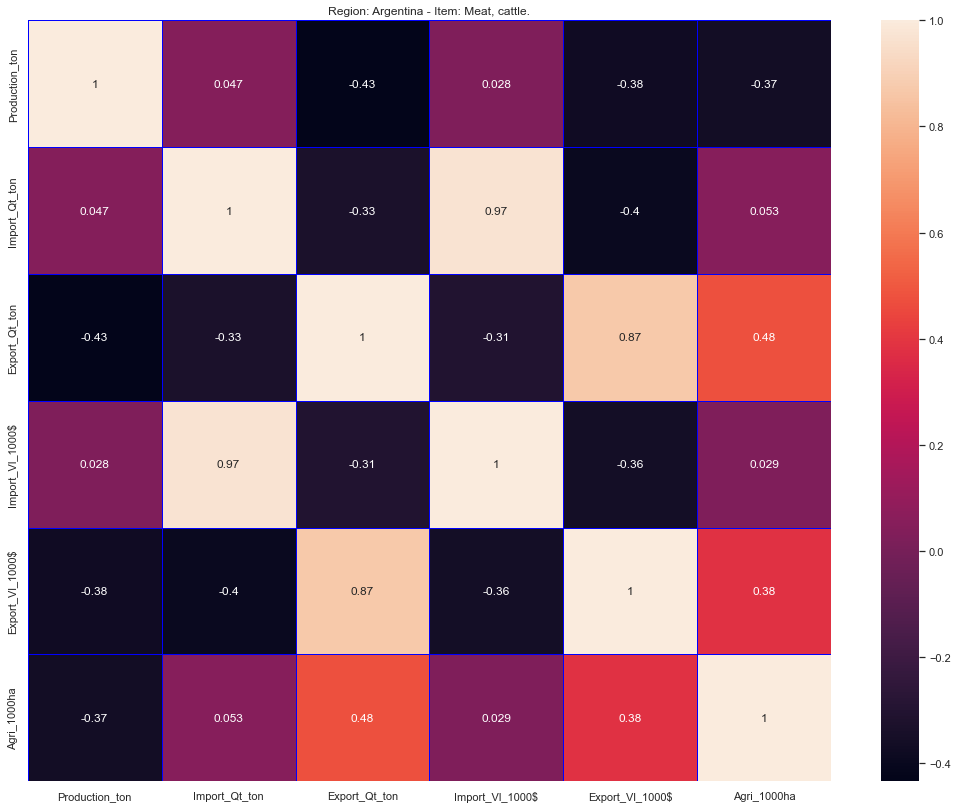

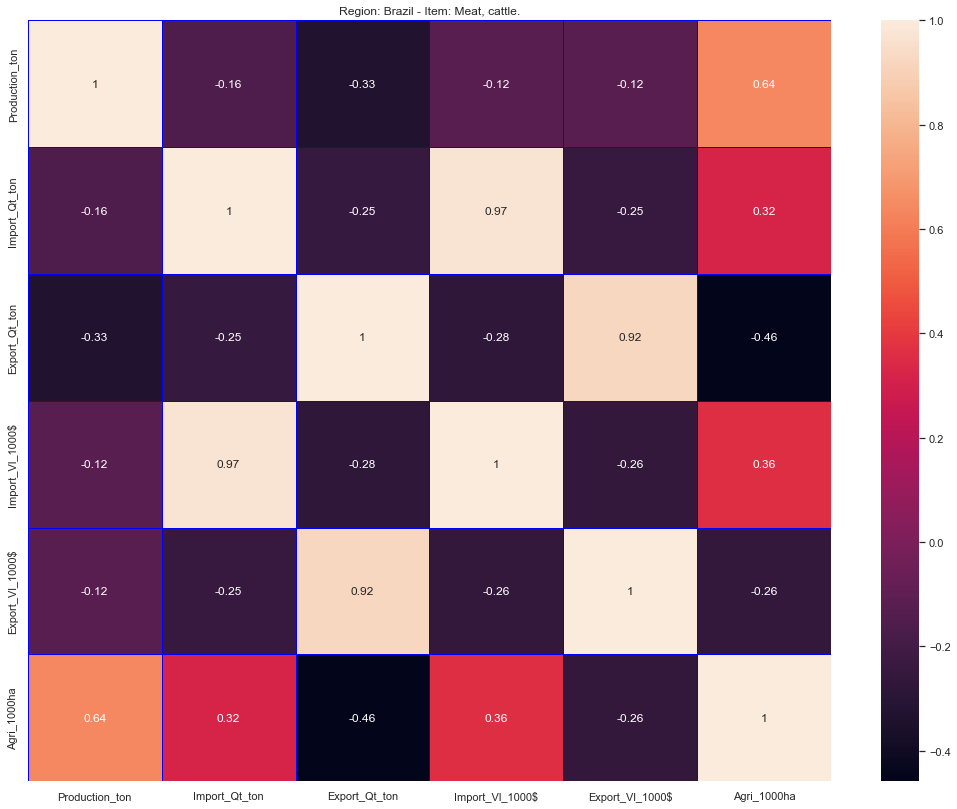

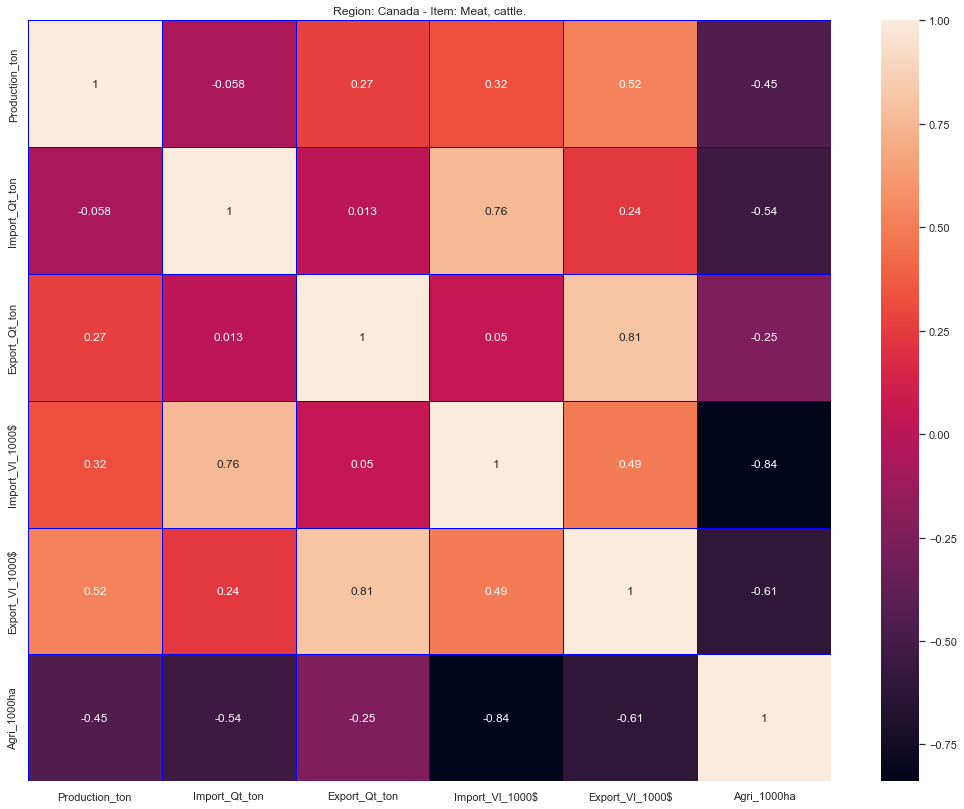

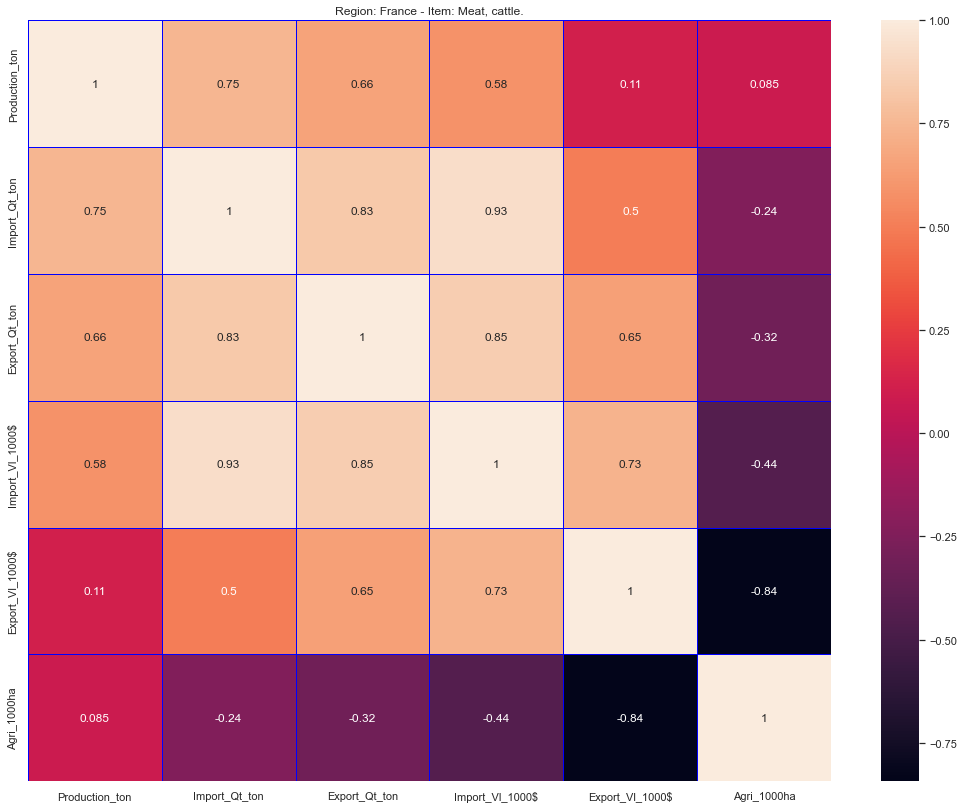

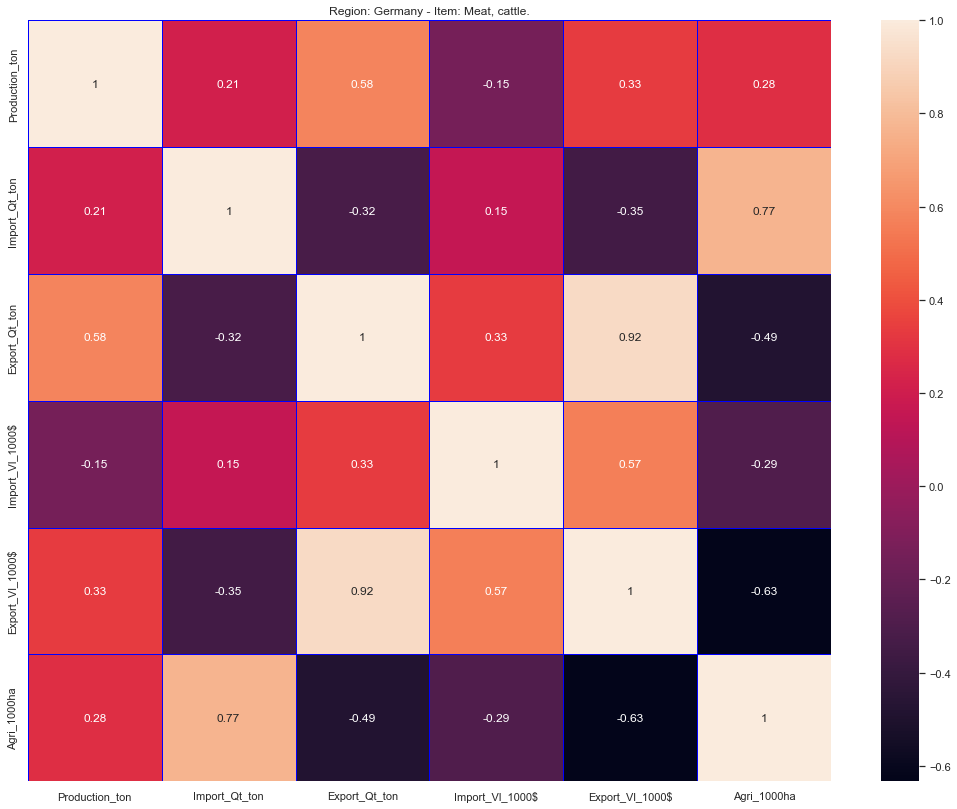

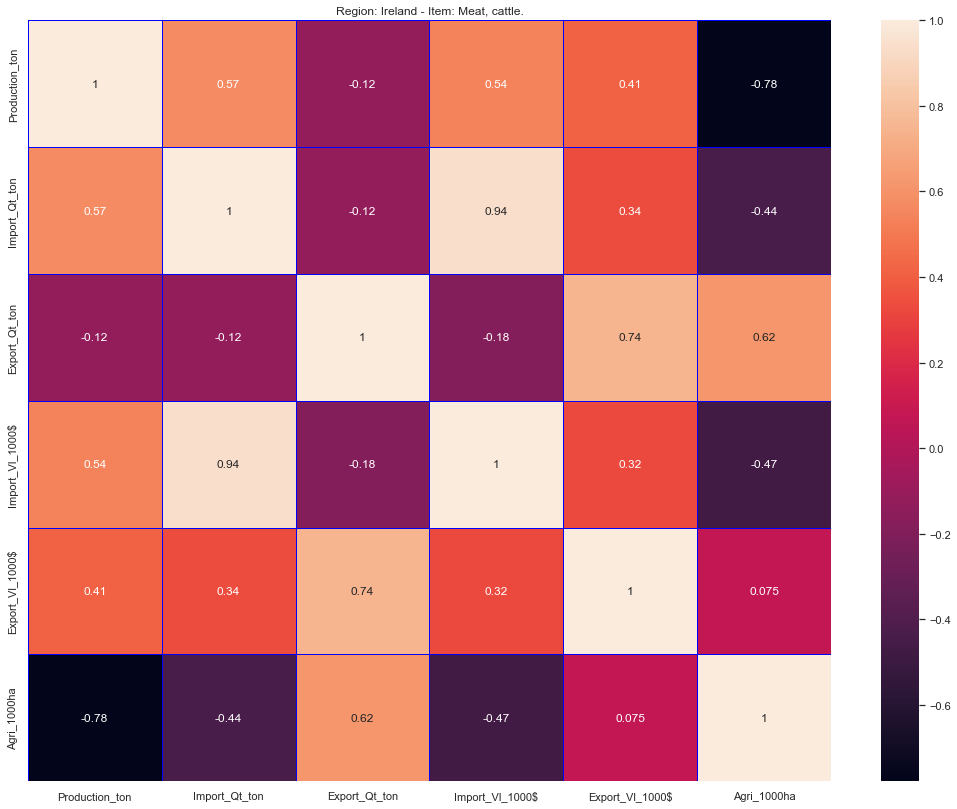

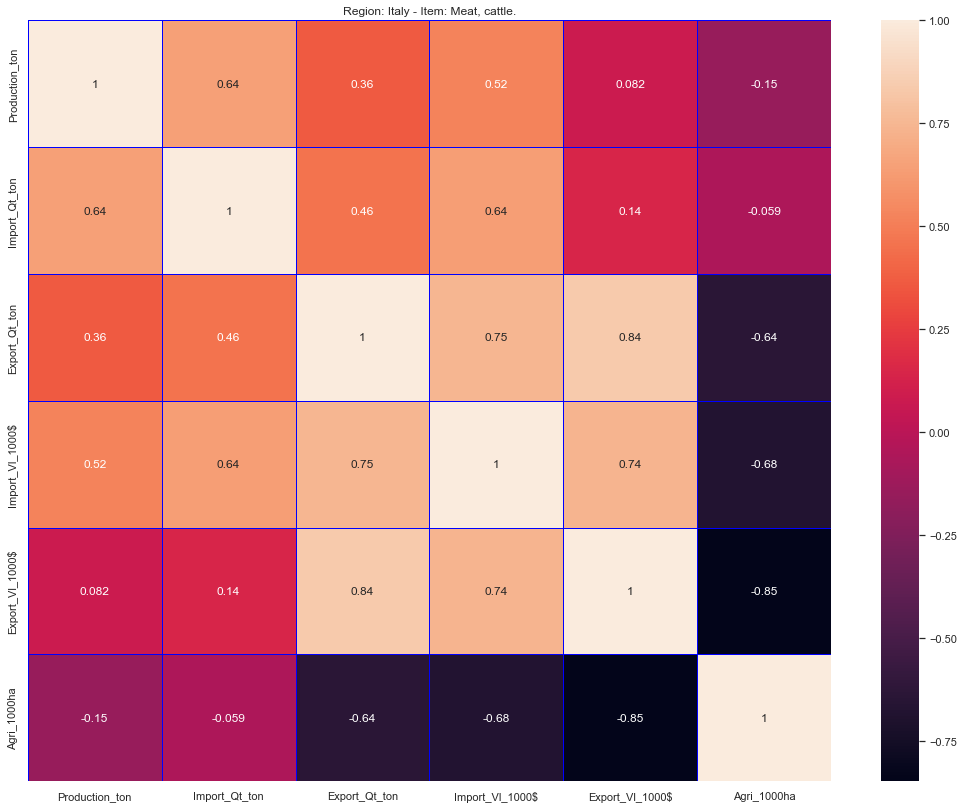

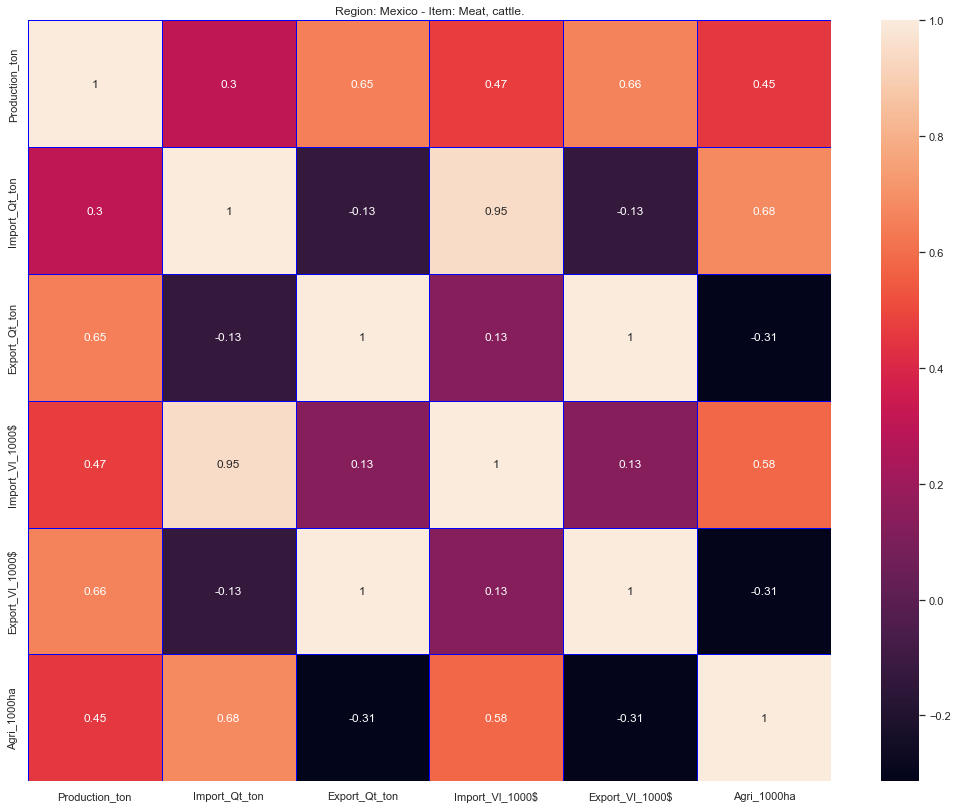

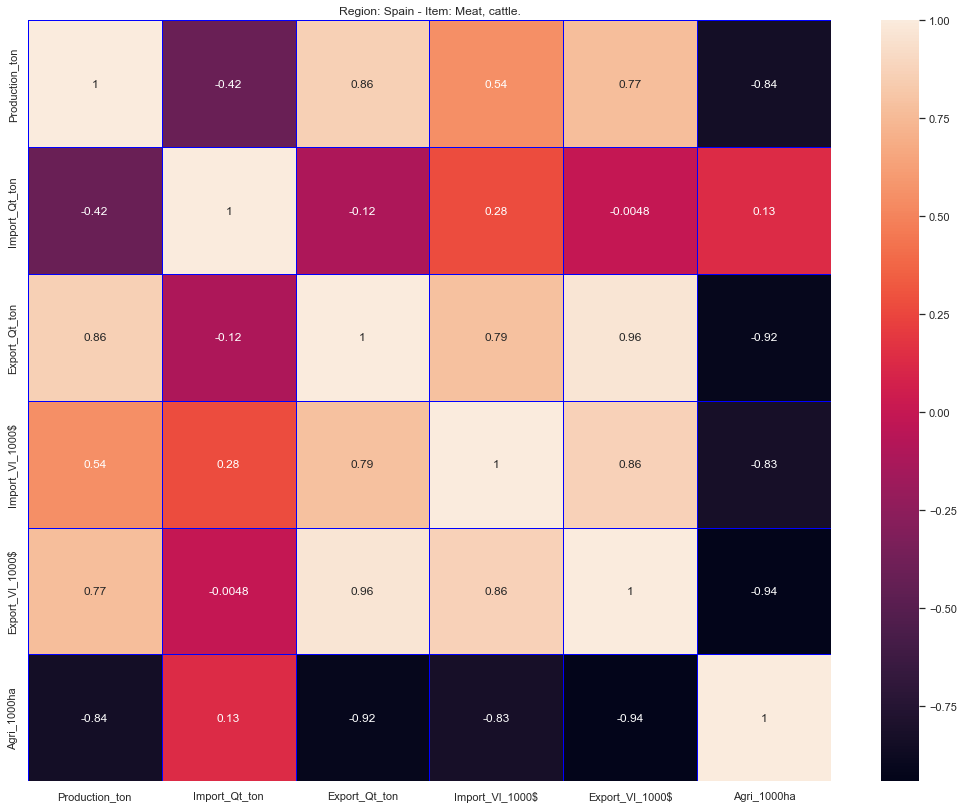

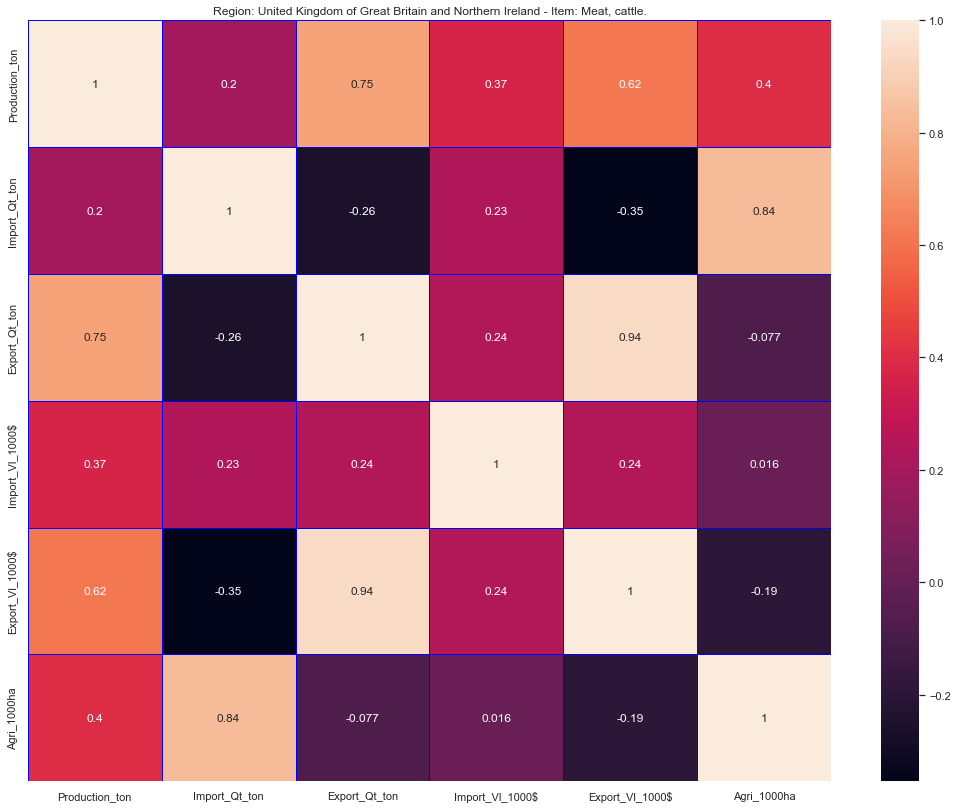

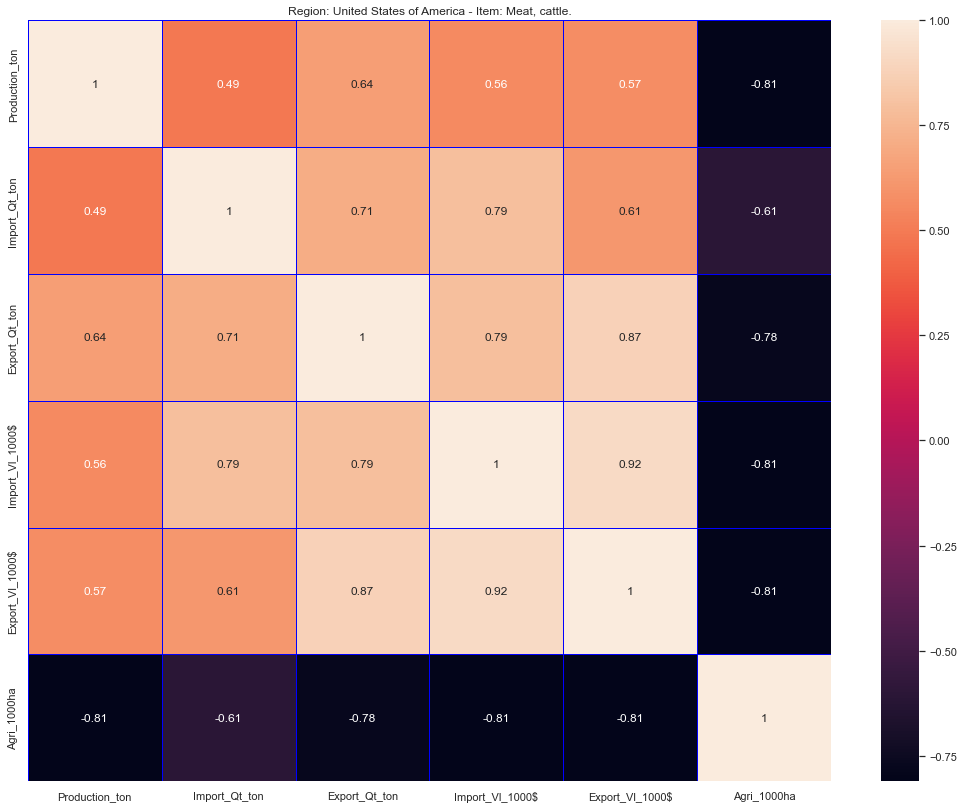

In [29]:
for country in total_df.Area.unique():
  for item in total_df.Item.unique():
    country_df = total_df.loc[(total_df.Area == country)&(total_df.Item == item)]
    plt.figure(figsize=(18,14))
    sns.heatmap(country_df.corr(),annot=True,linecolor="blue",lw=0.5).set_title("Region: {0} - Item: {1}.".format(country,item))
    plt.show()

## Boxplot (Distribution)

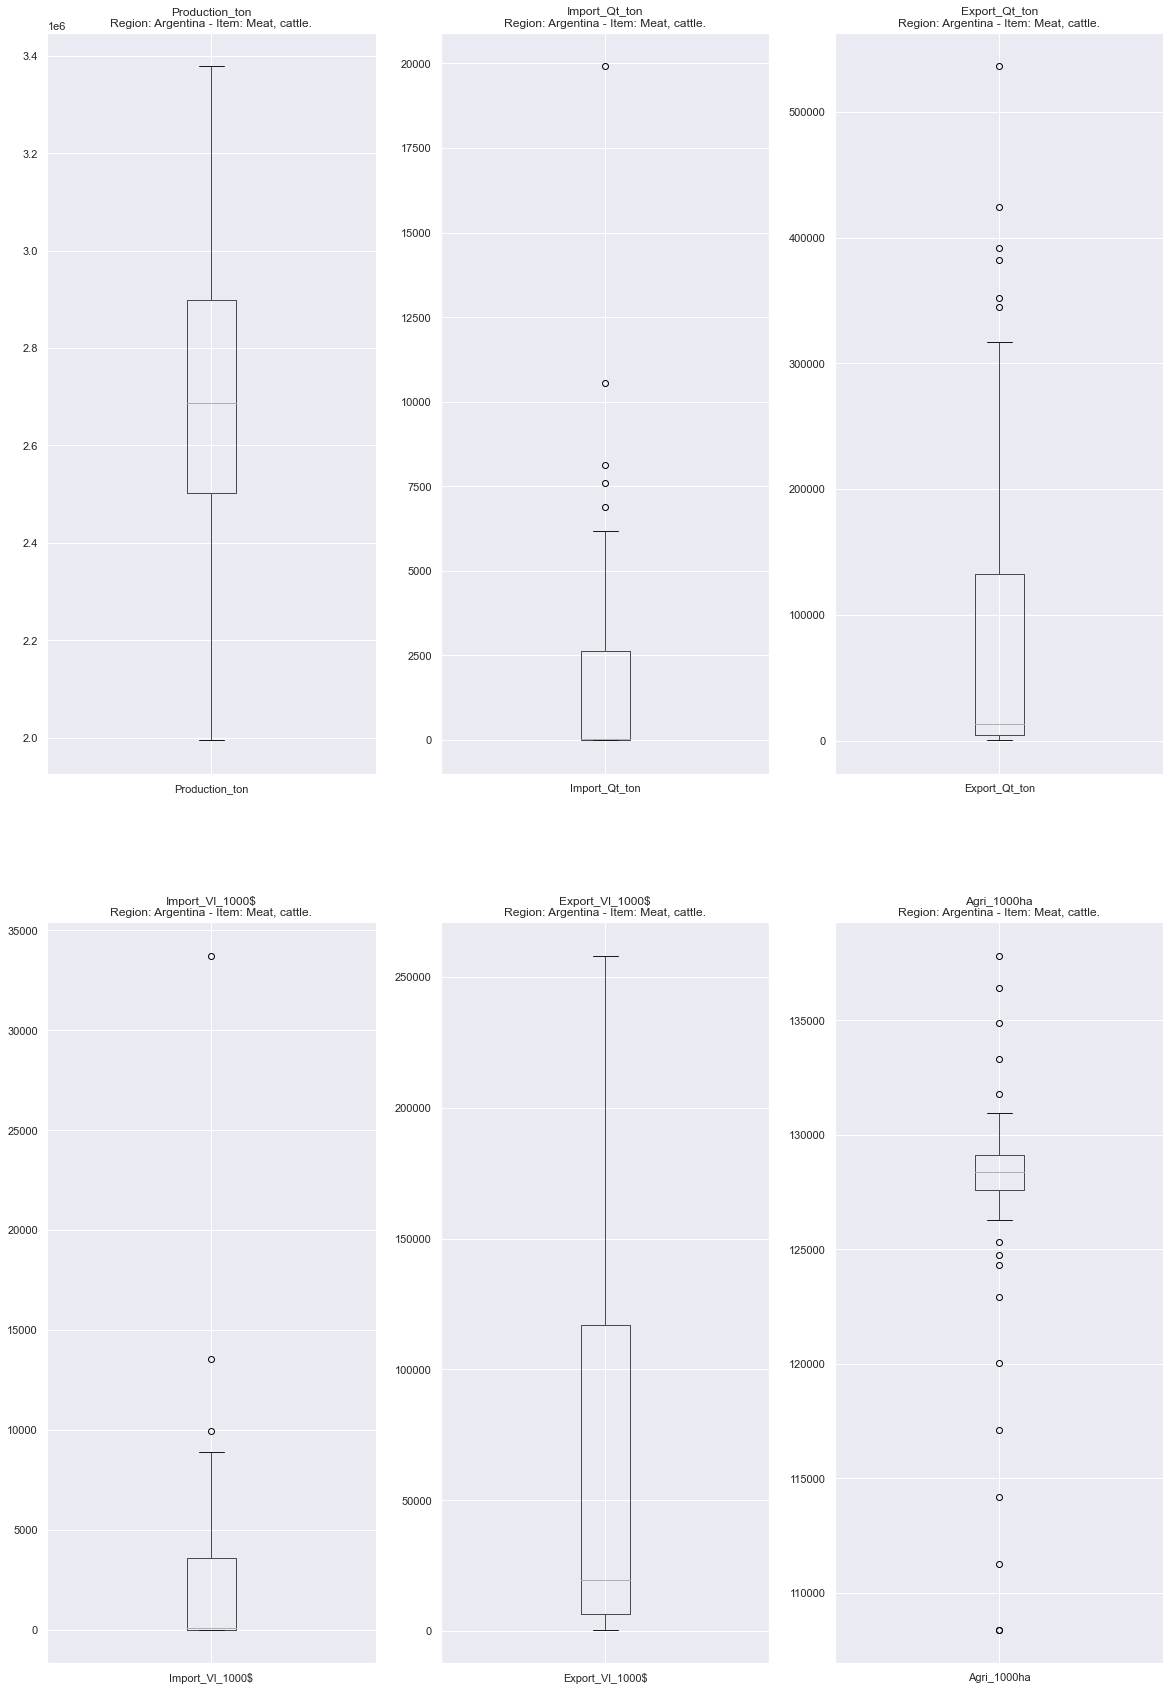

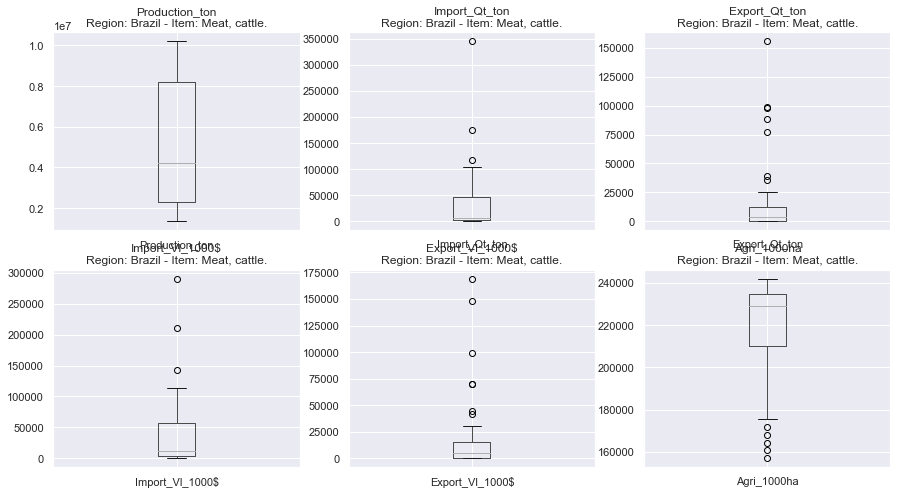

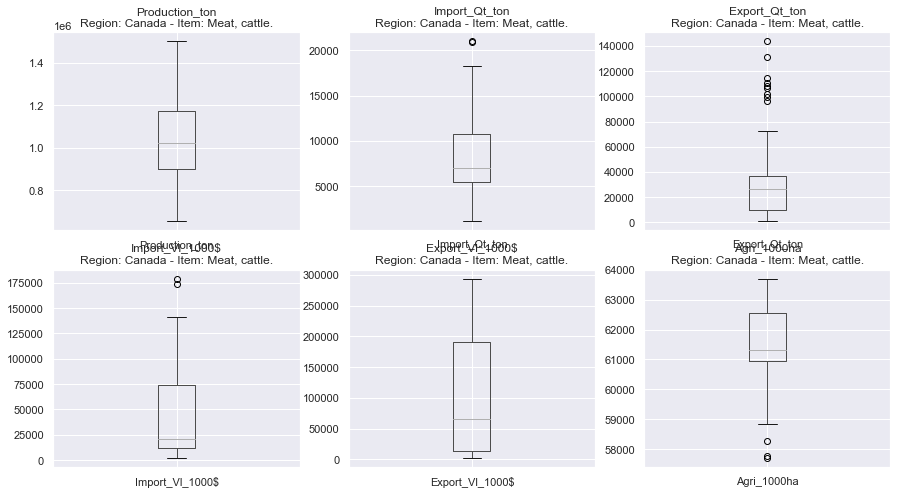

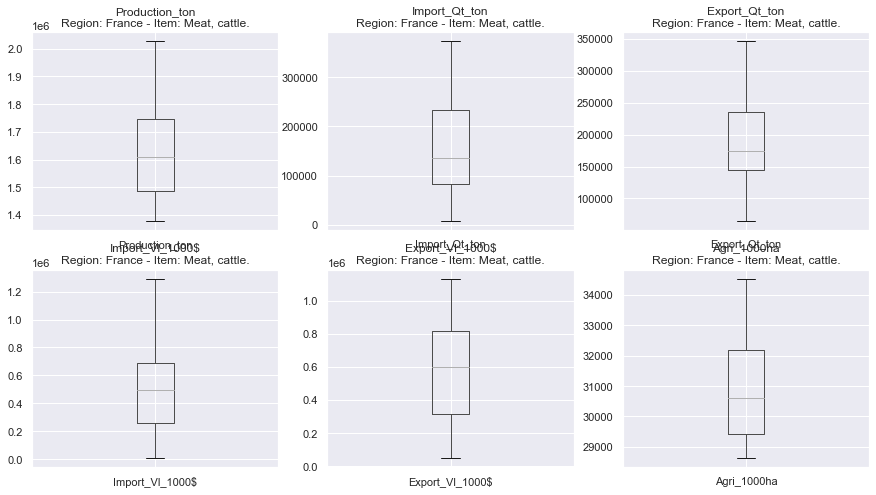

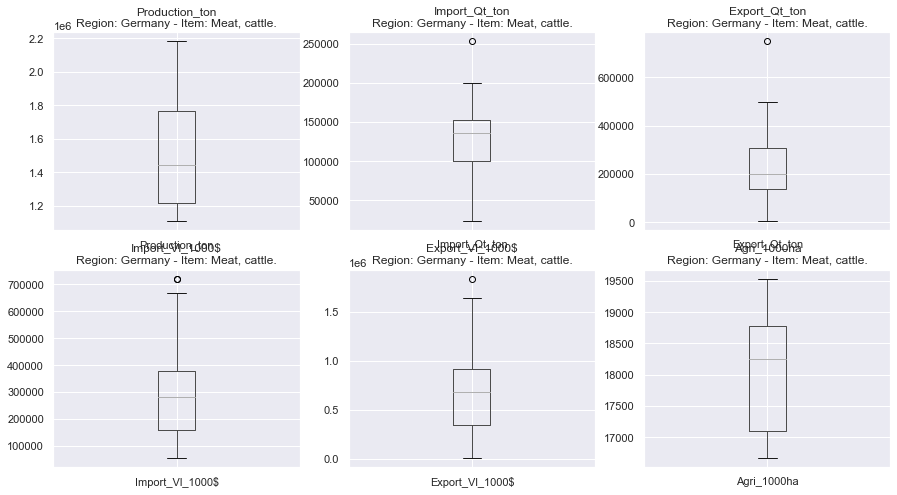

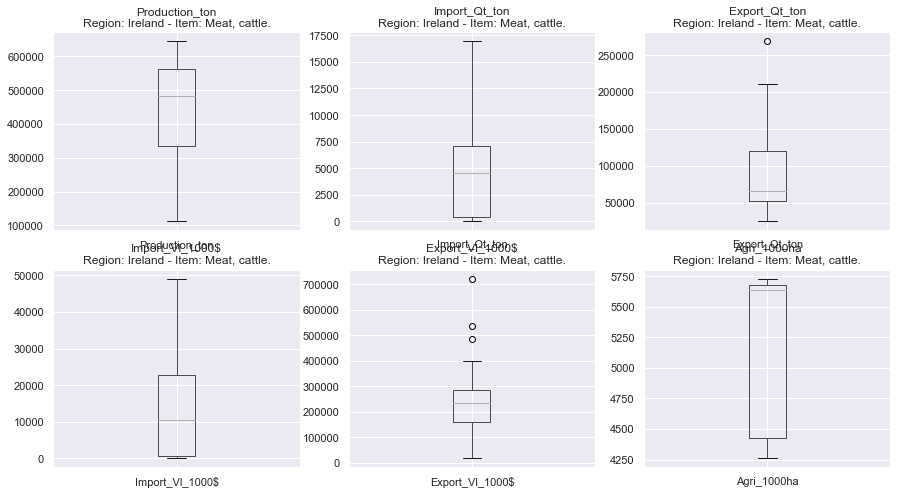

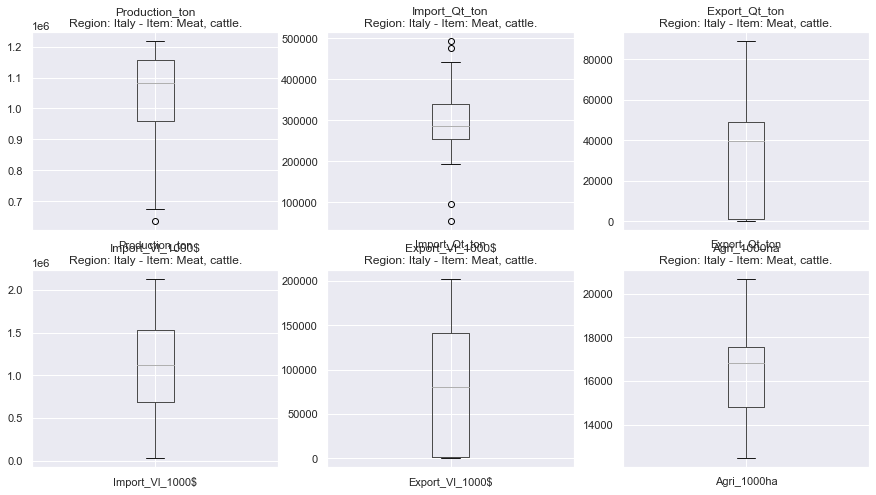

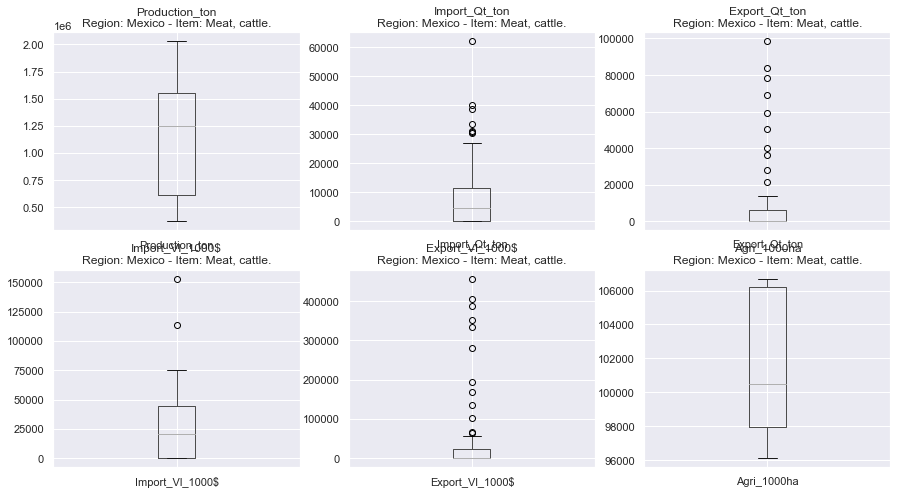

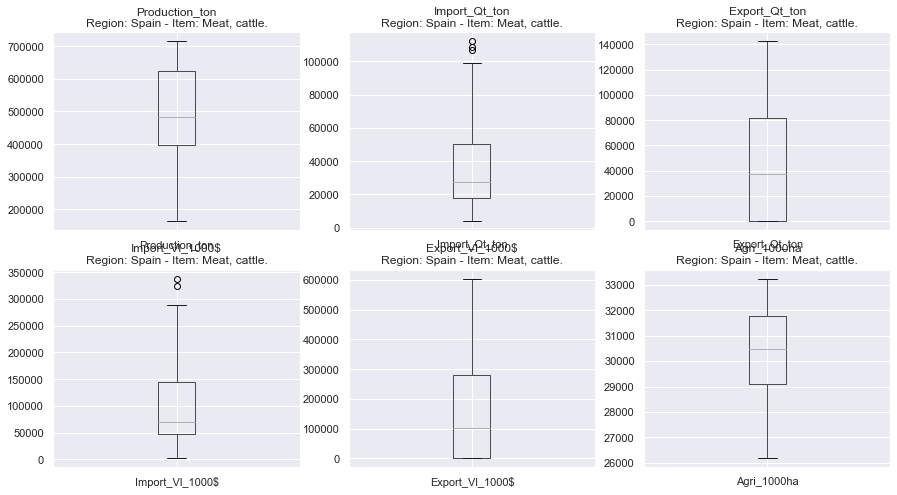

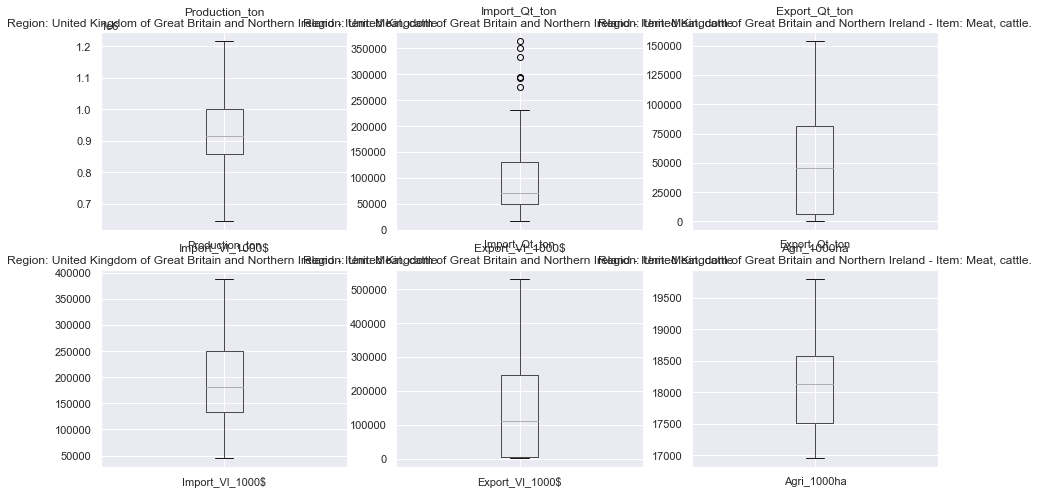

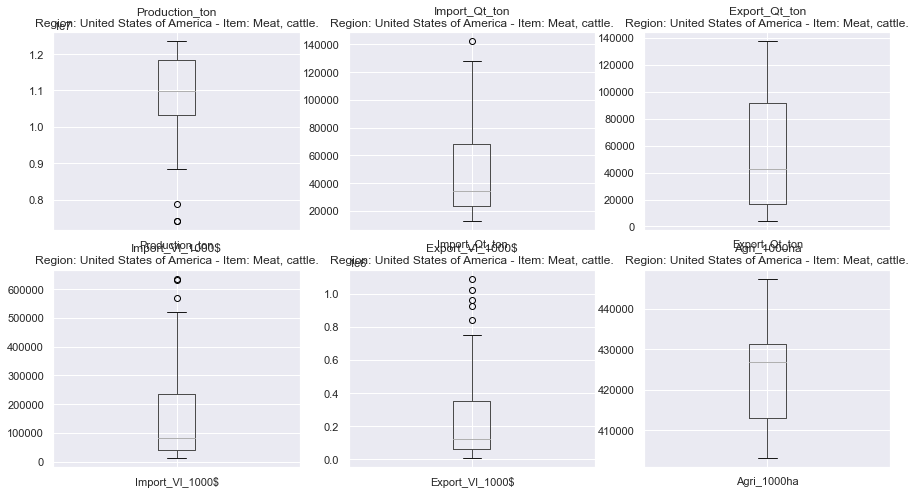

In [30]:
plt.figure(figsize=(20, 30))

for country in total_df.Area.unique():
    for item in total_df.Item.unique():
        country_df = total_df.loc[(total_df.Area == country)
                                  & (total_df.Item == item)]

        col_dict = {}
        contador = 1
        for column in country_df.drop(["Area", "Item", "Year"],
                                      axis=1).columns:
            col_dict.update({column: contador})
            contador += 1

        for variable, i in col_dict.items():
            t = "{0}\nRegion: {1} - Item: {2}.".format(variable, country, item)
            plt.subplot(2, 3, i)
            country_df.boxplot(column=variable)
            plt.title(t)
        plt.show()

## Histogram

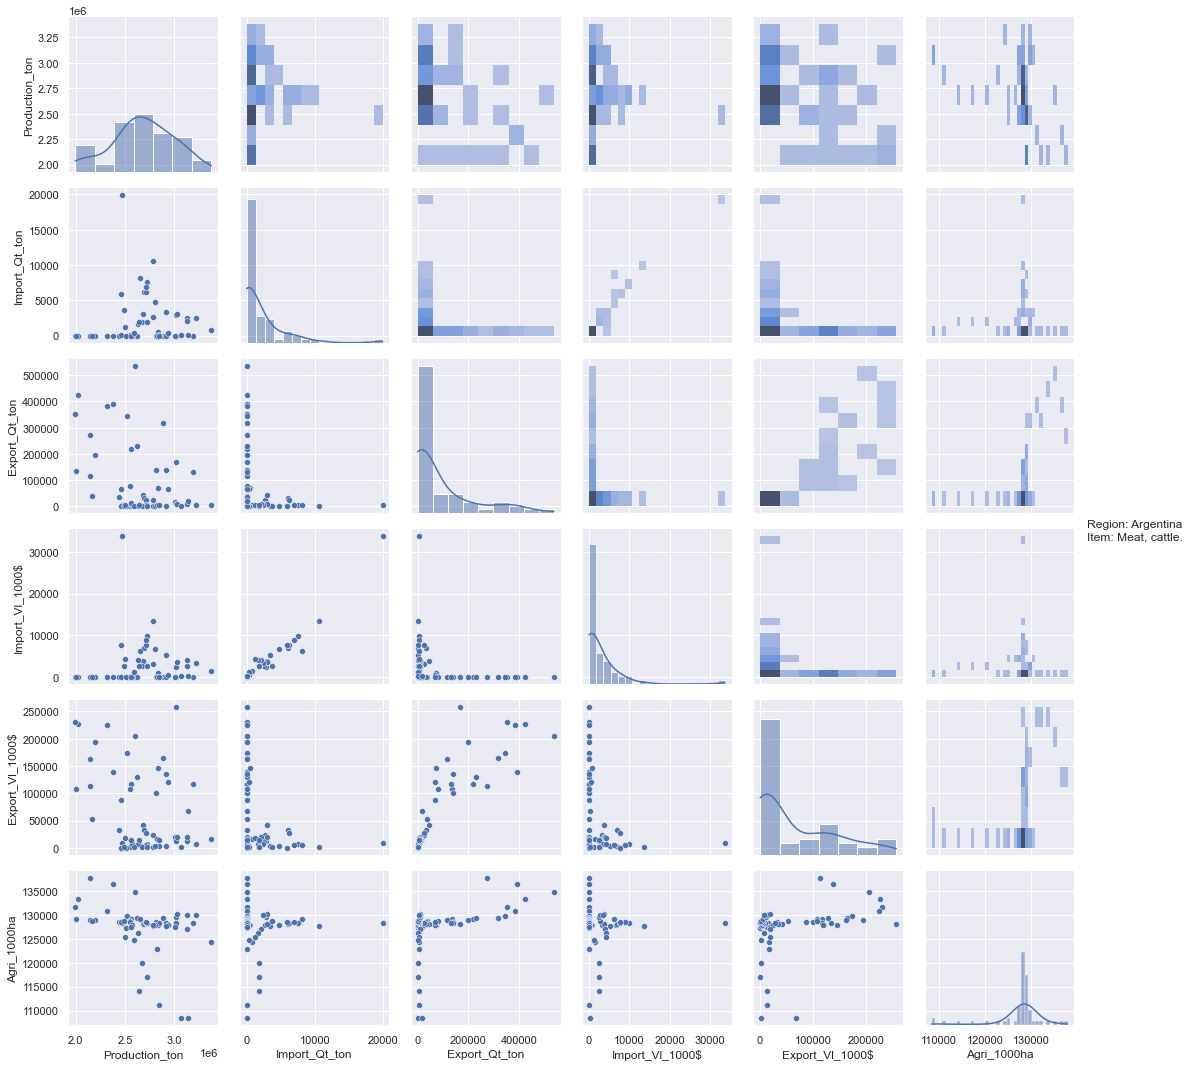

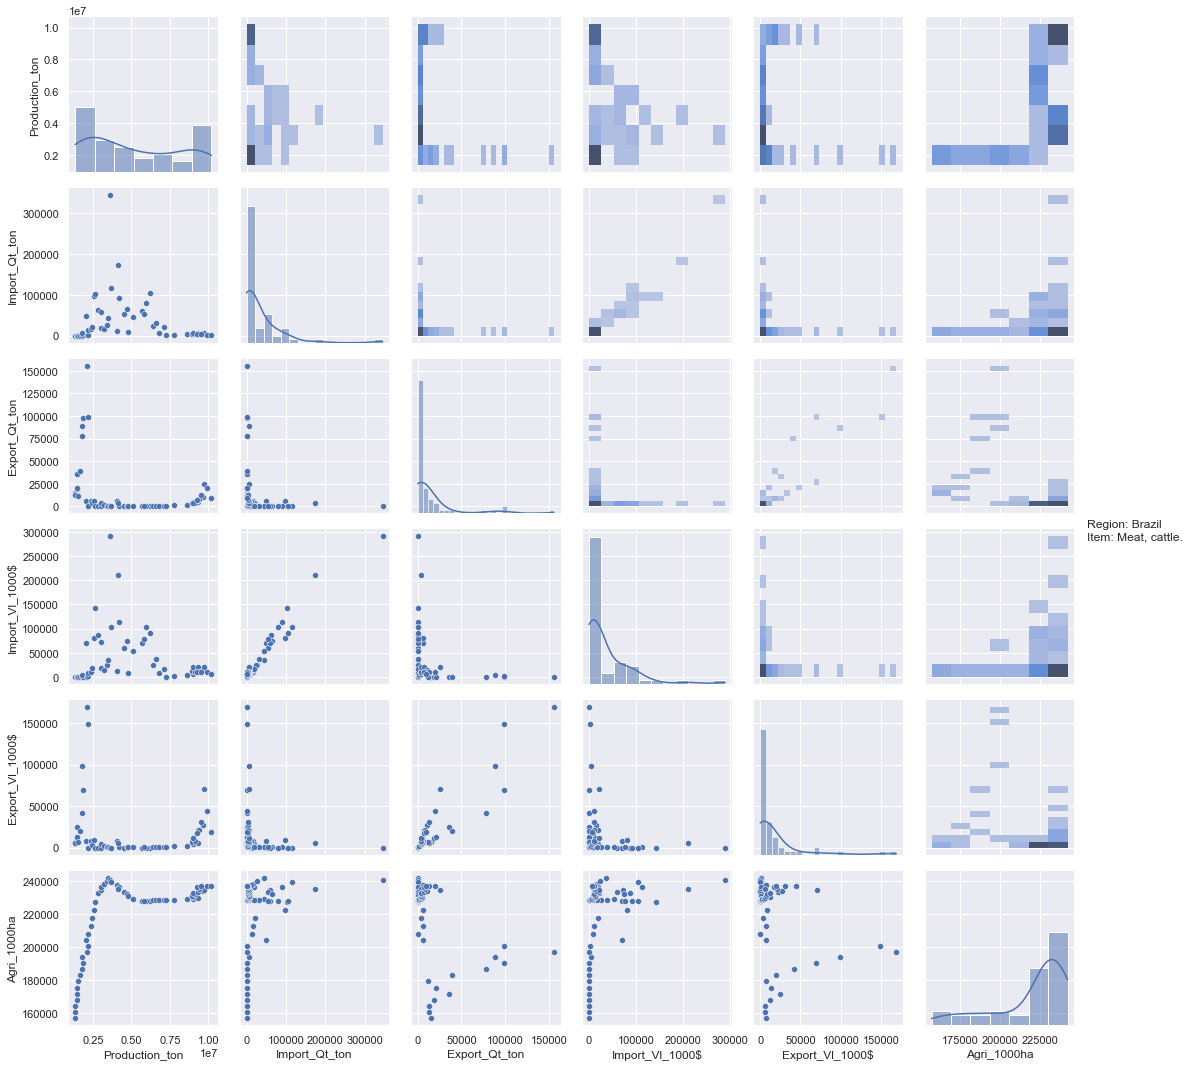

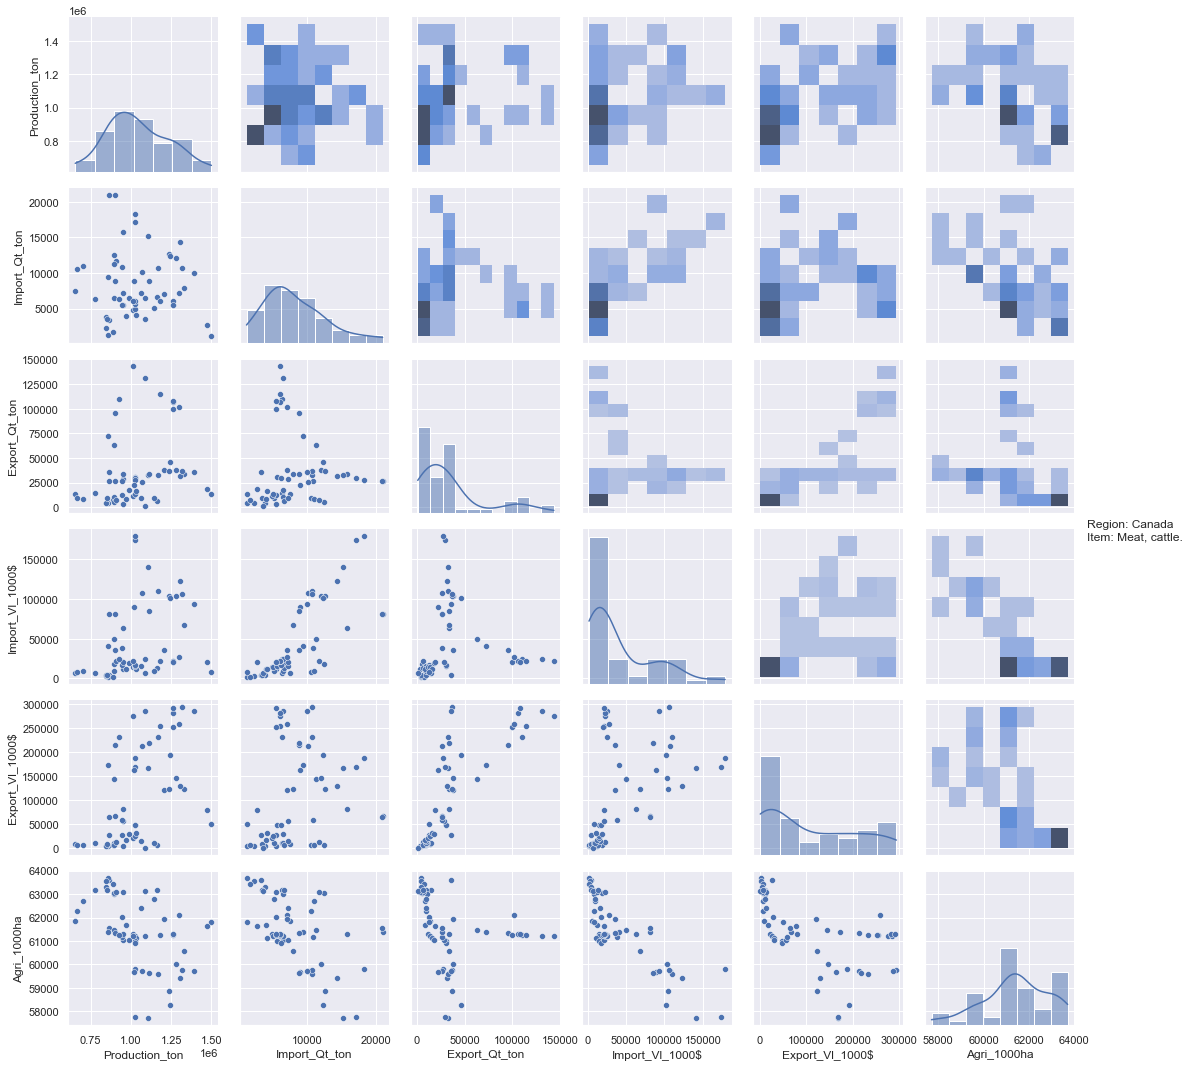

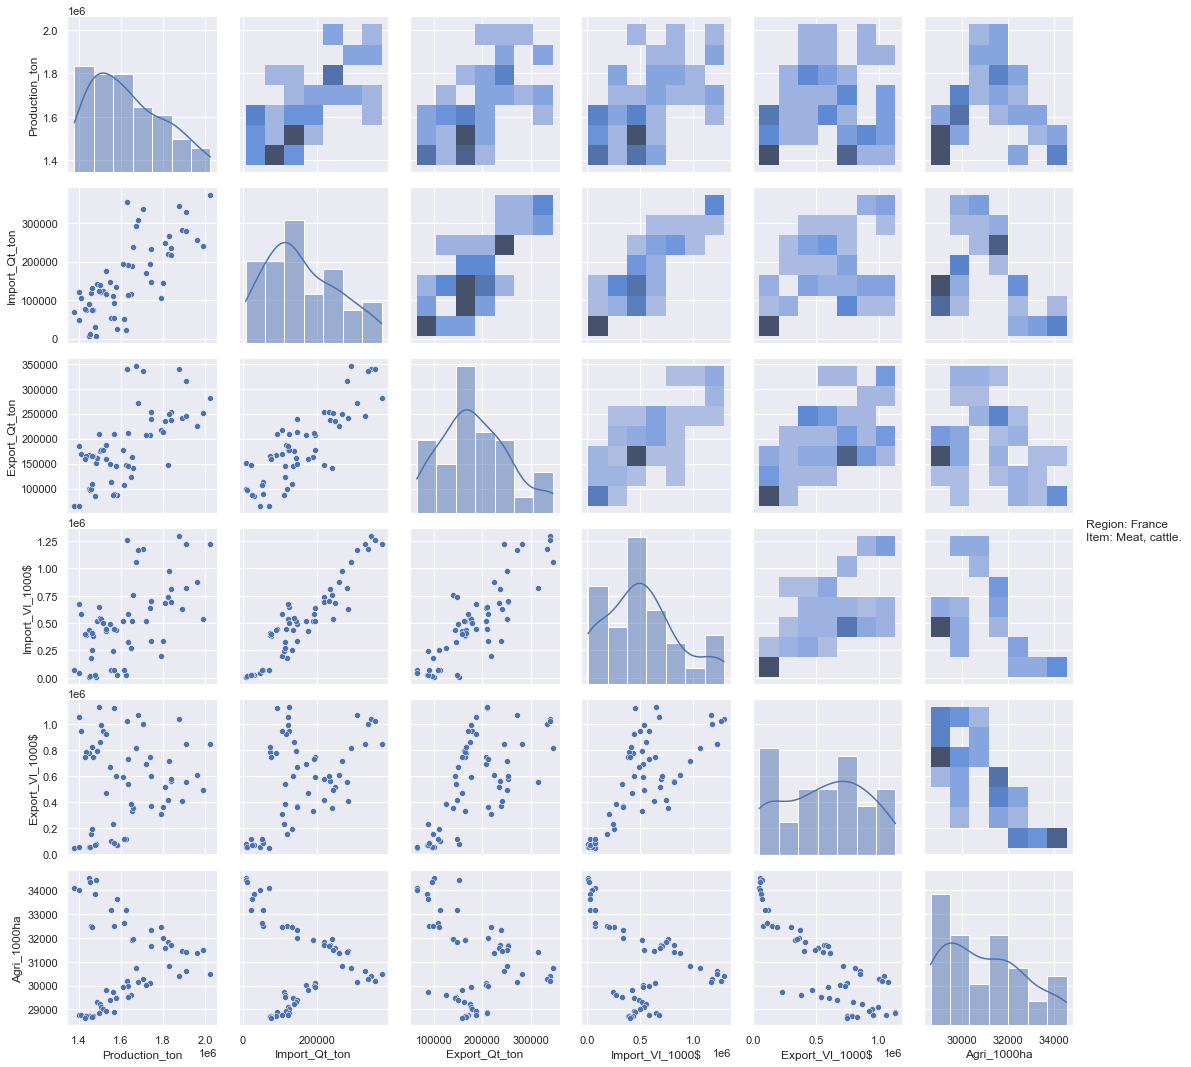

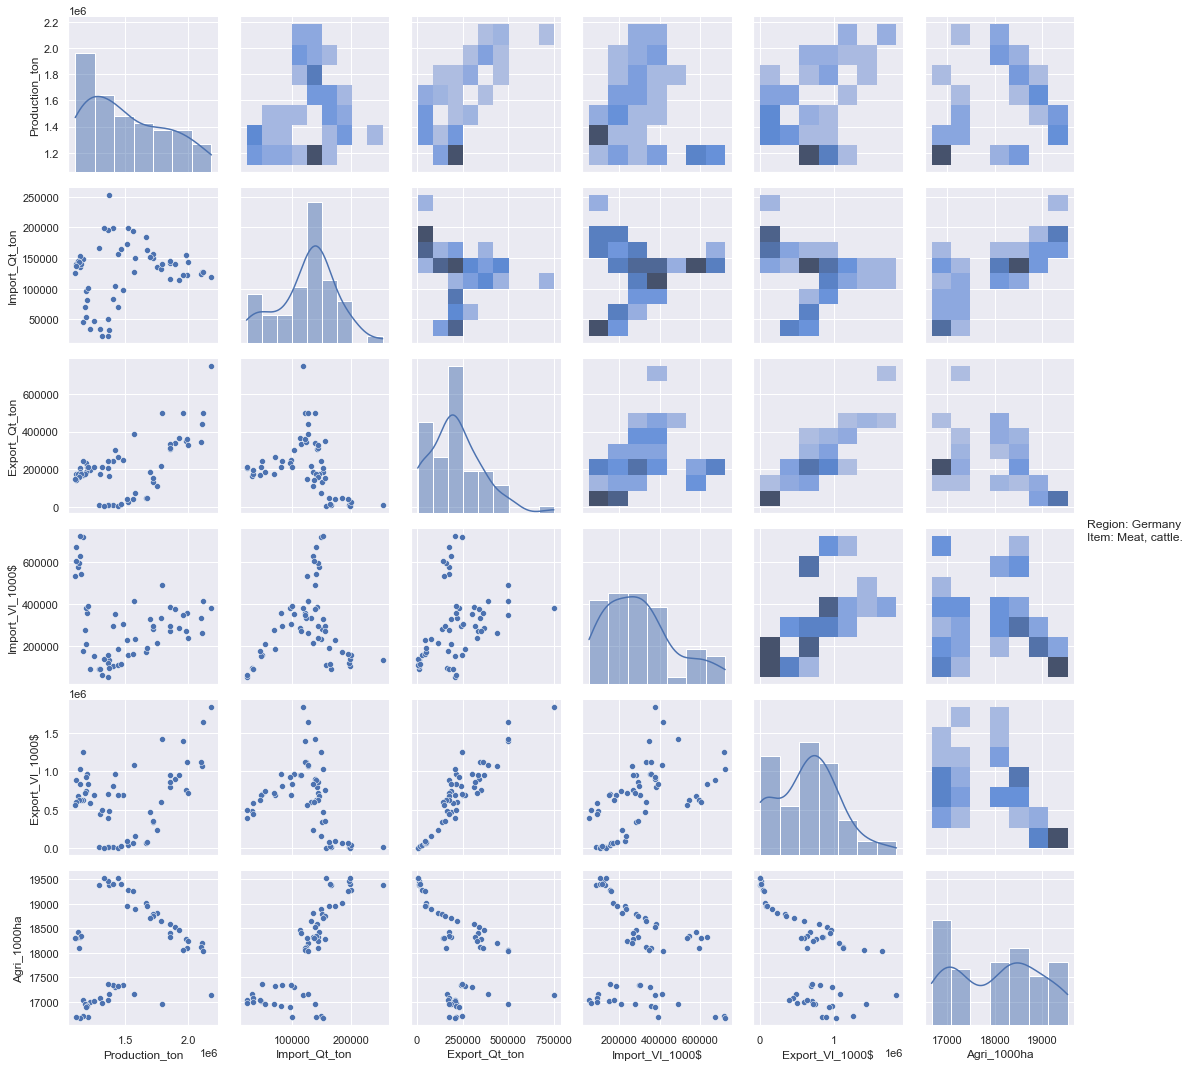

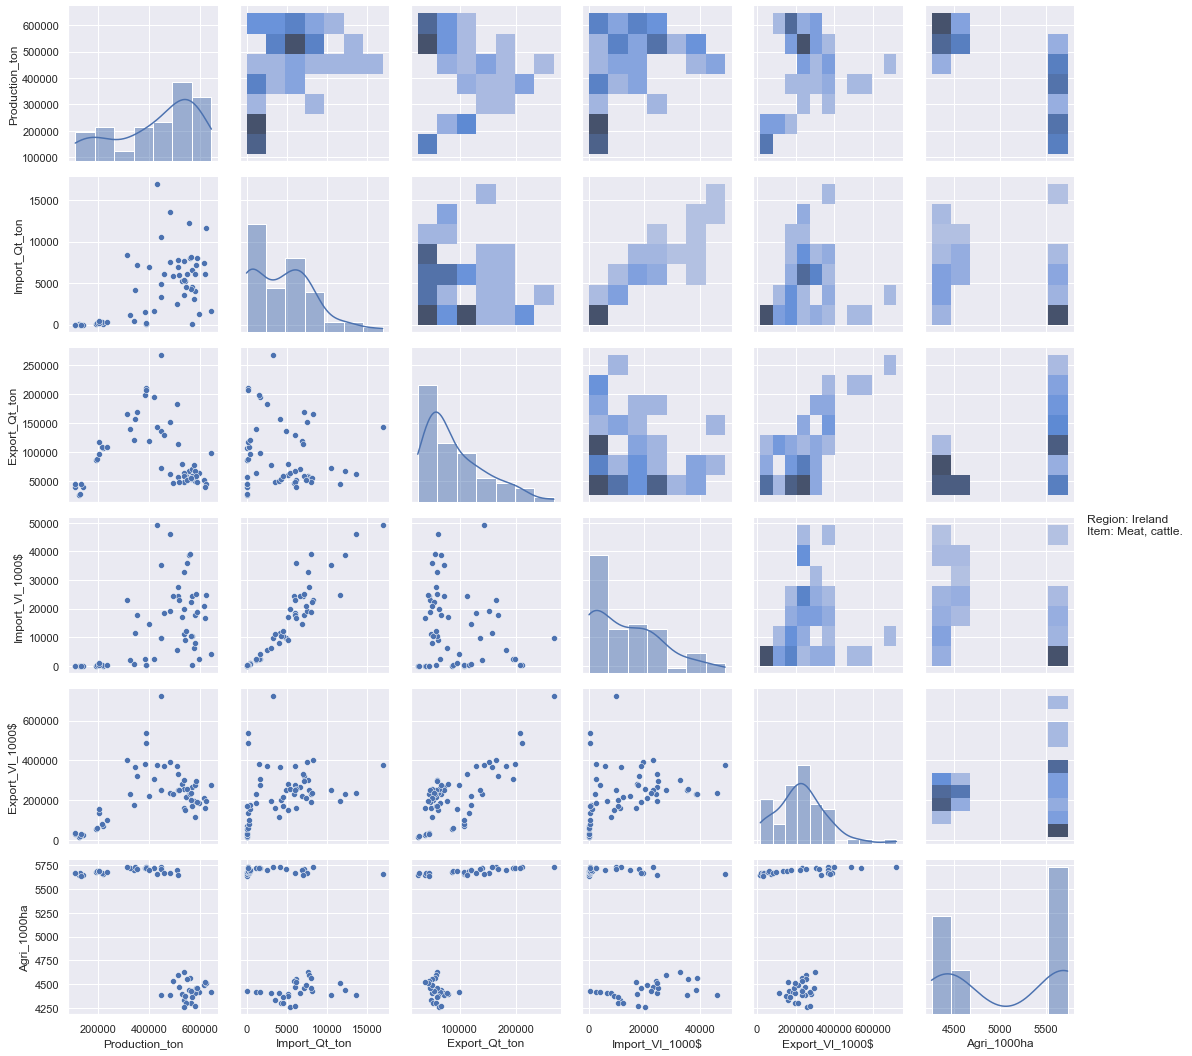

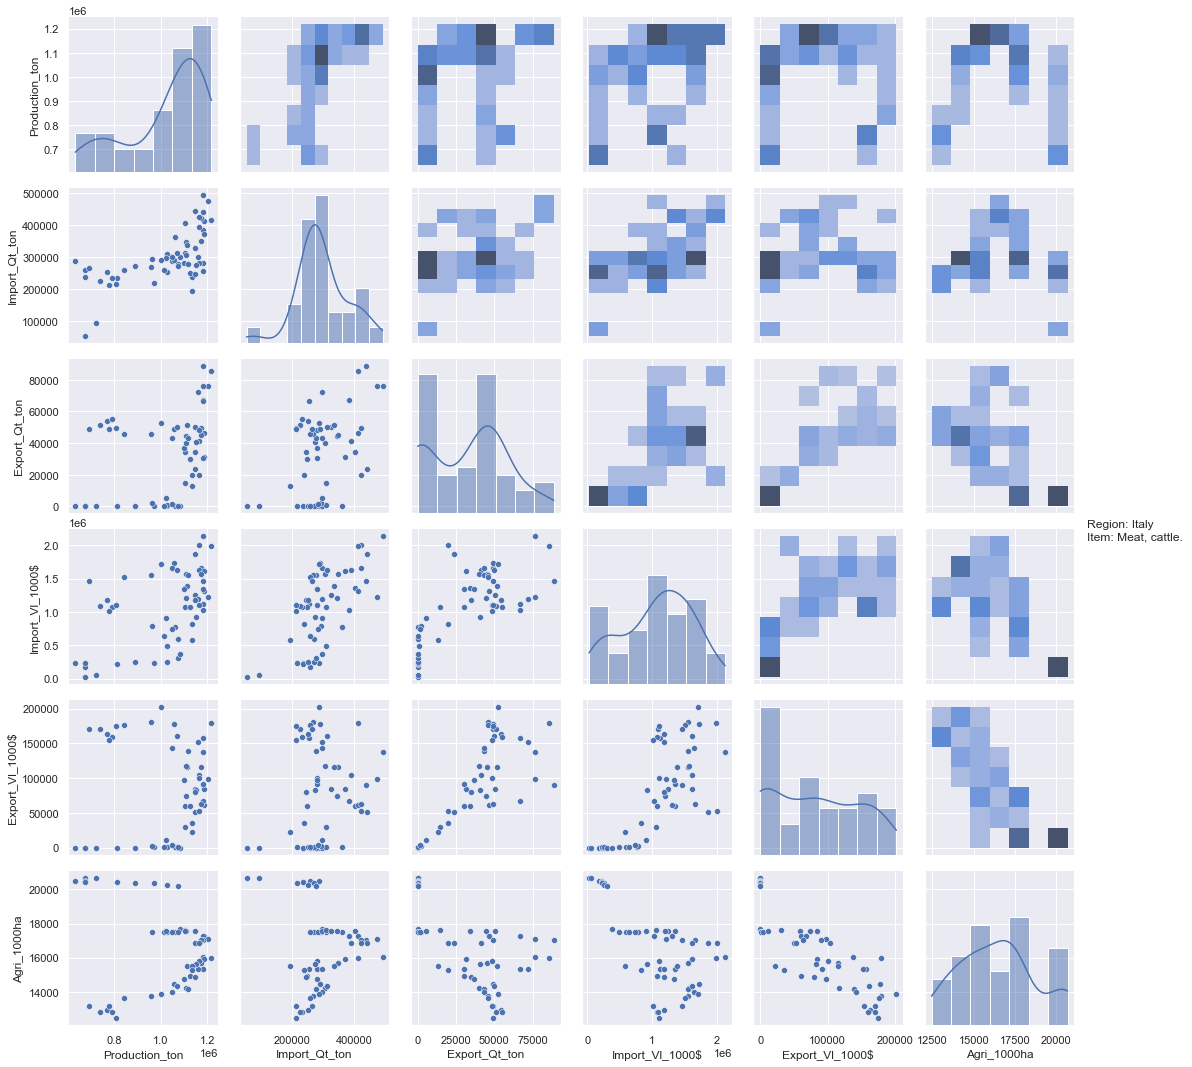

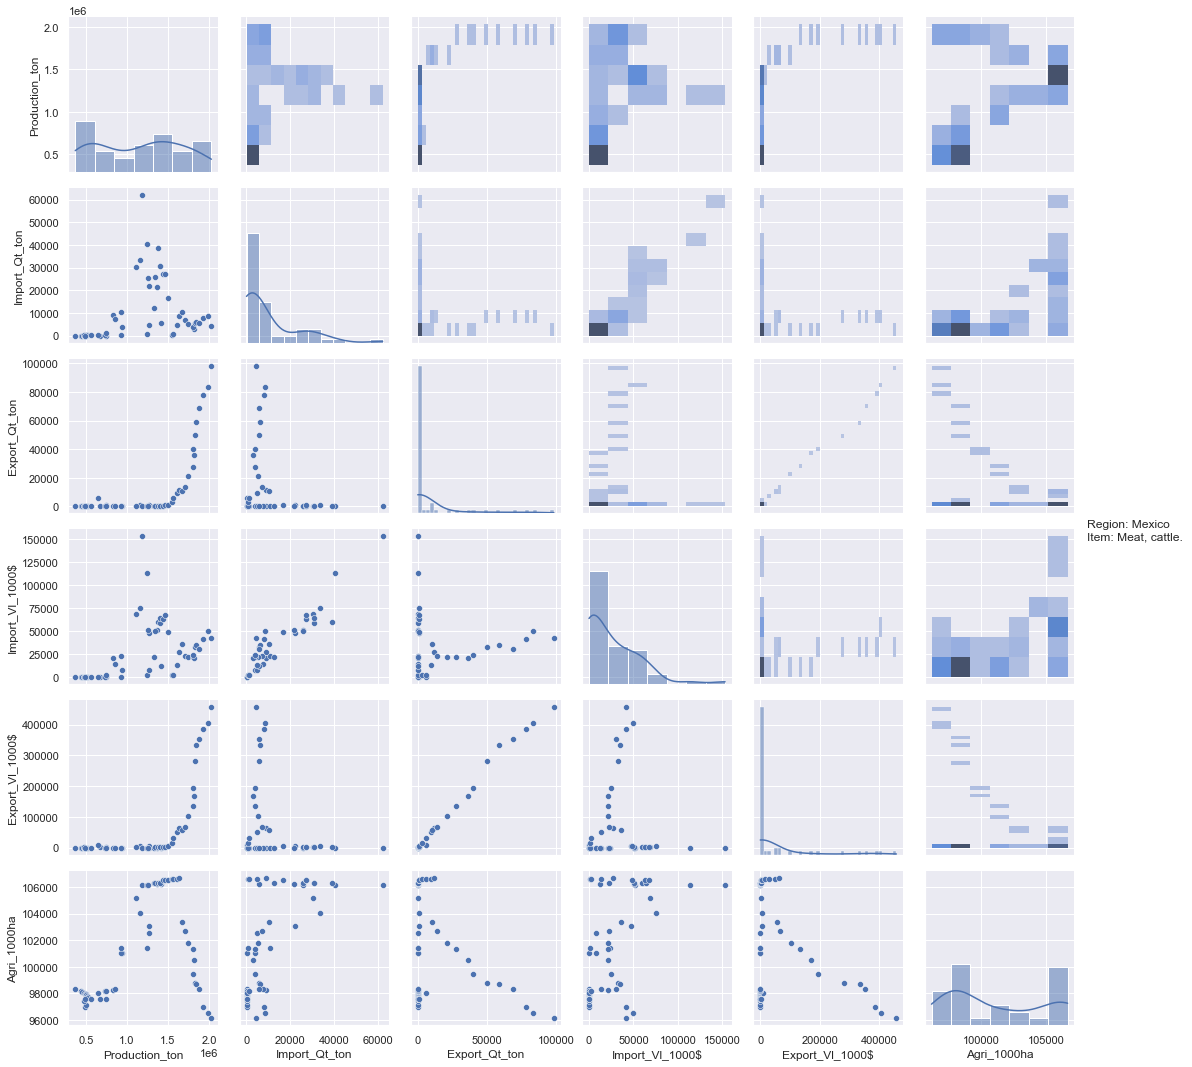

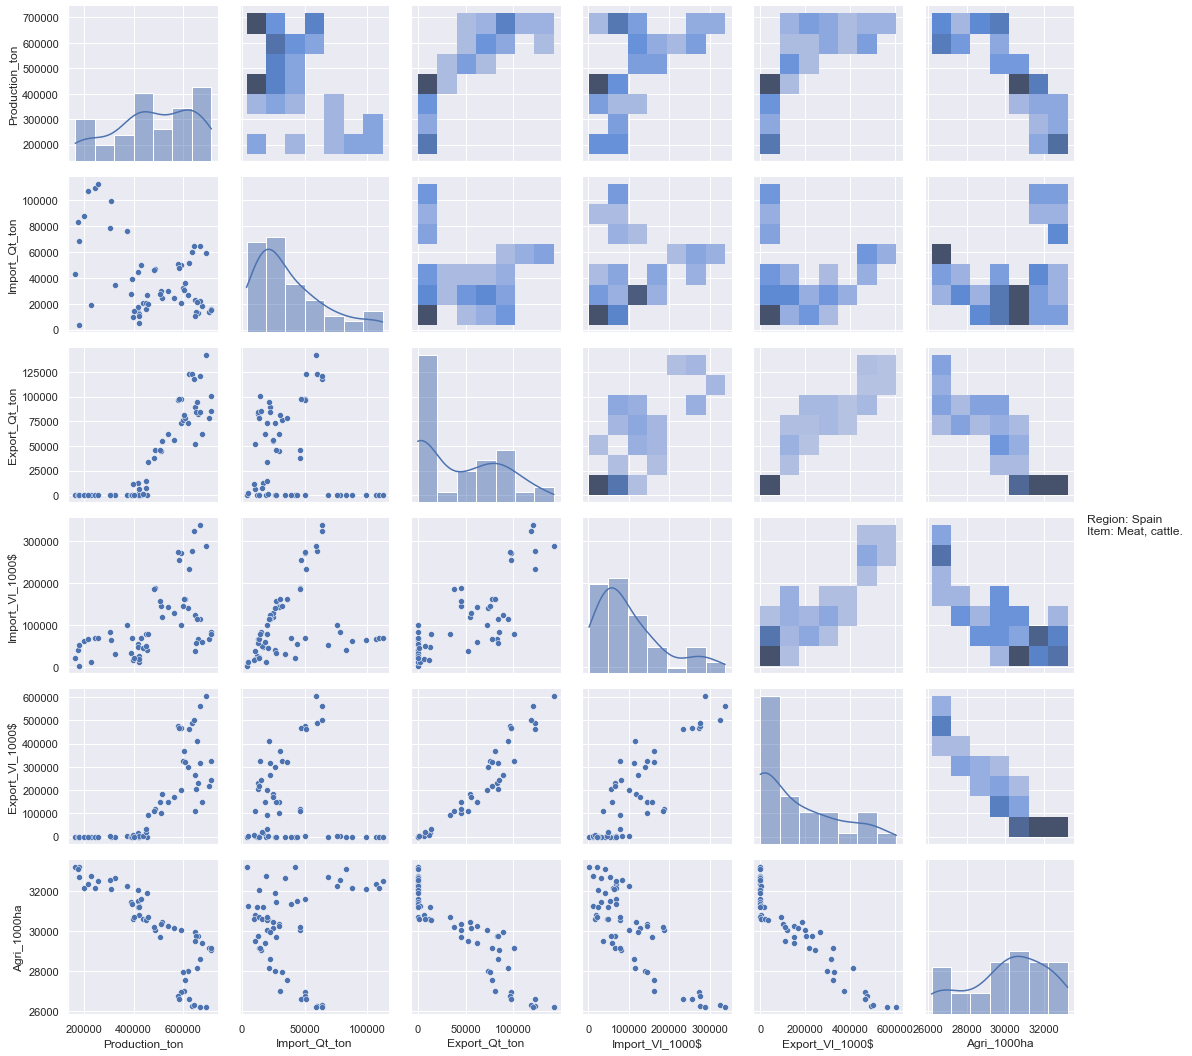

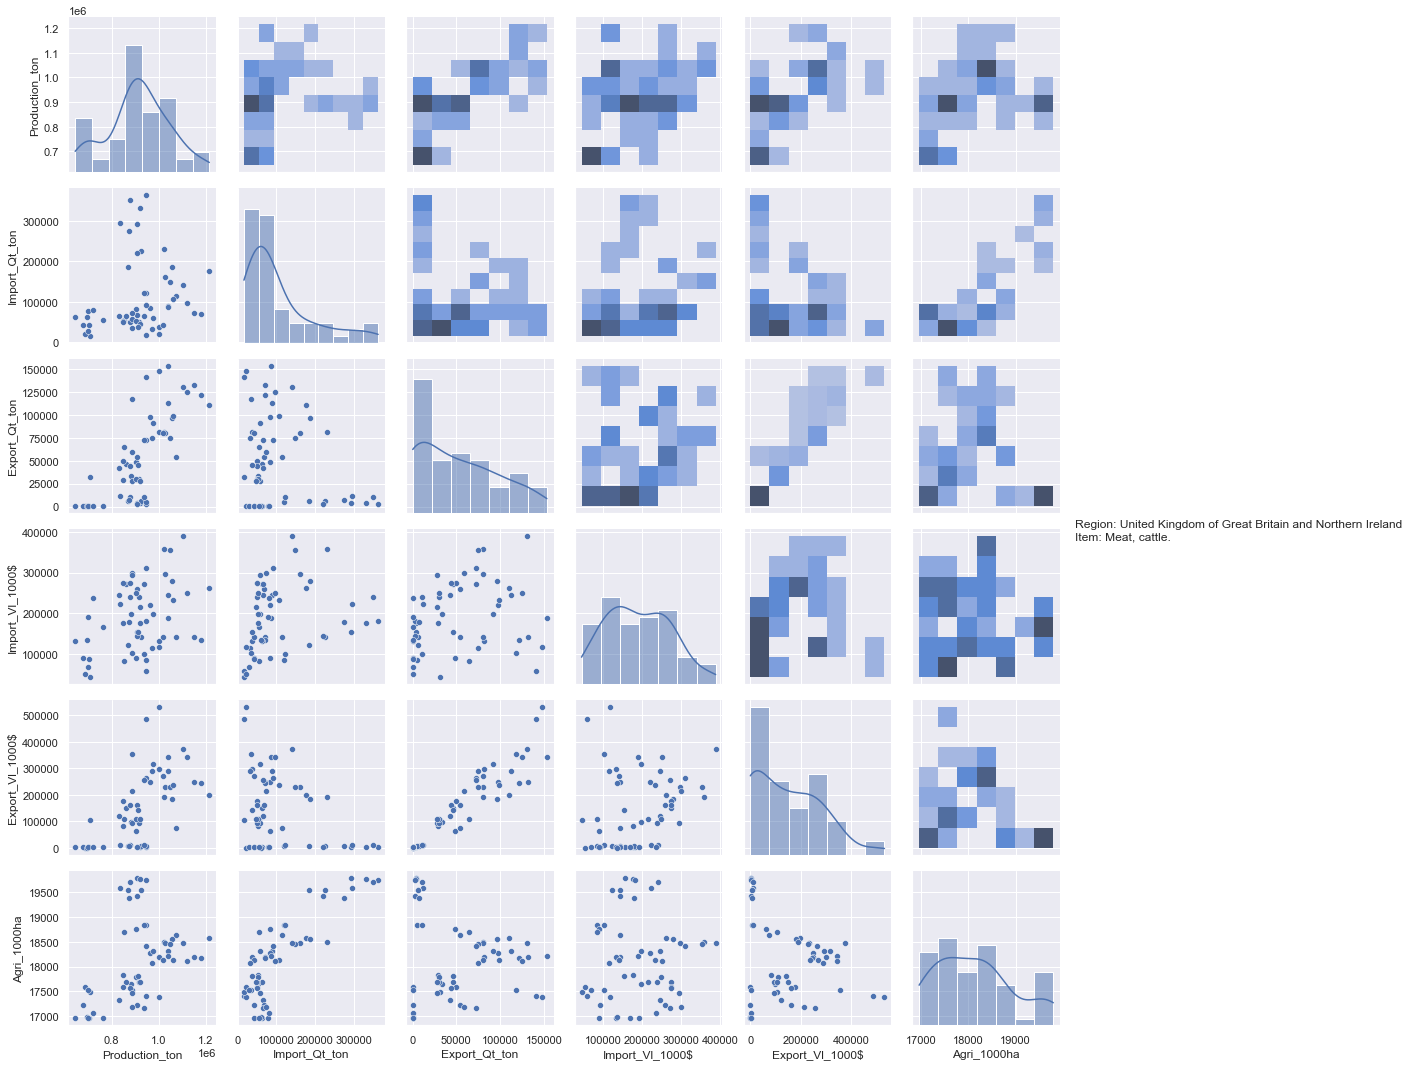

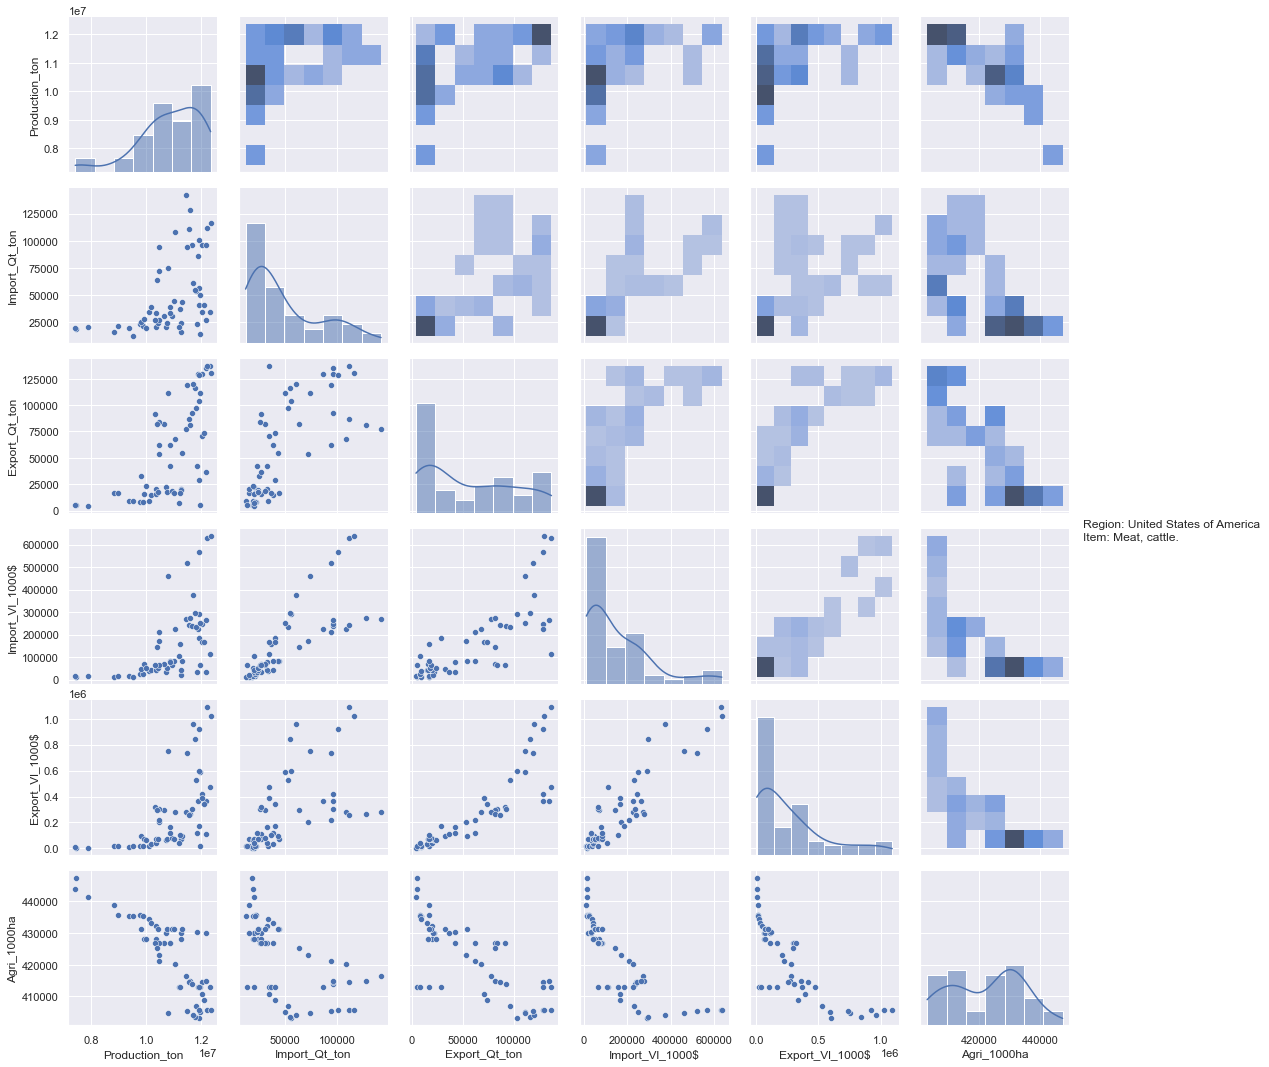

In [31]:
for country in total_df.Area.unique():
    for item in total_df.Item.unique():
        country_df = total_df.loc[(total_df.Area == country)
                                  & (total_df.Item == item)]

        g = sns.PairGrid(country_df.drop(["Area", "Item", "Year"], axis=1))
        g.map_upper(sns.histplot)
        g.map_lower(sns.scatterplot)
        g.map_diag(sns.histplot, kde=True)
        g.add_legend(title="Region: {0}\nItem: {1}.".format(country, item))
        plt.show()

In [32]:
columns_to_plot = list(ratio_df.columns)
columns_to_plot.remove('Area')
columns_to_plot.remove('Item')
columns_to_plot.remove('Year')
columns_to_plot

['Production_ton',
 'Import_Qt_ton',
 'Export_Qt_ton',
 'Import_Vl_1000$',
 'Export_Vl_1000$']

In [33]:
columns = ['Area', 'Year']
columns.append("Production_ton")
ratio_df[columns]

Area  Year  Production_ton
0                   Argentina  1961       15.563227
1                   Argentina  1962       17.435727
2                   Argentina  1963       19.316308
3                   Argentina  1964       15.148428
4                   Argentina  1965       15.139596
..                        ...   ...             ...
644  United States of America  2015       26.629857
645  United States of America  2016       28.303994
646  United States of America  2017       29.341881
647  United States of America  2018       30.110624
648  United States of America  2019       30.429852

[649 rows x 3 columns]

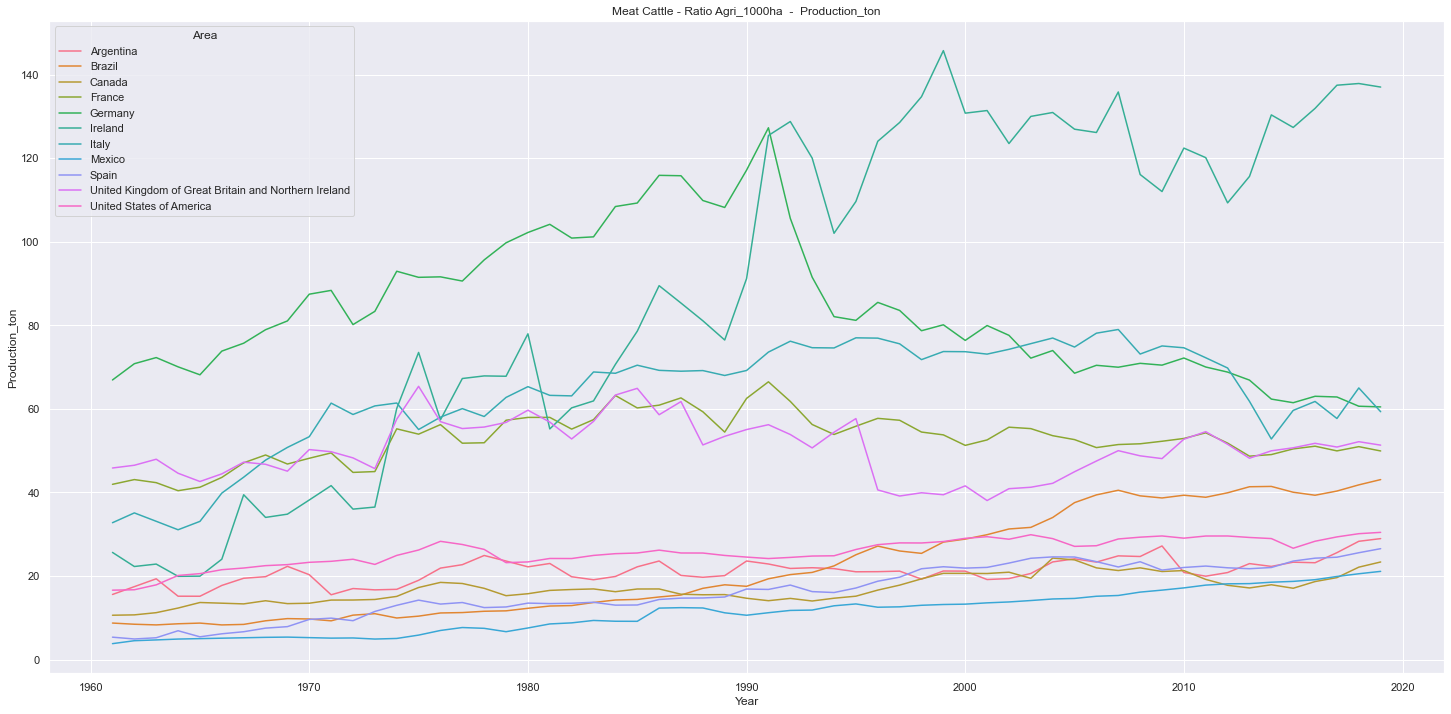

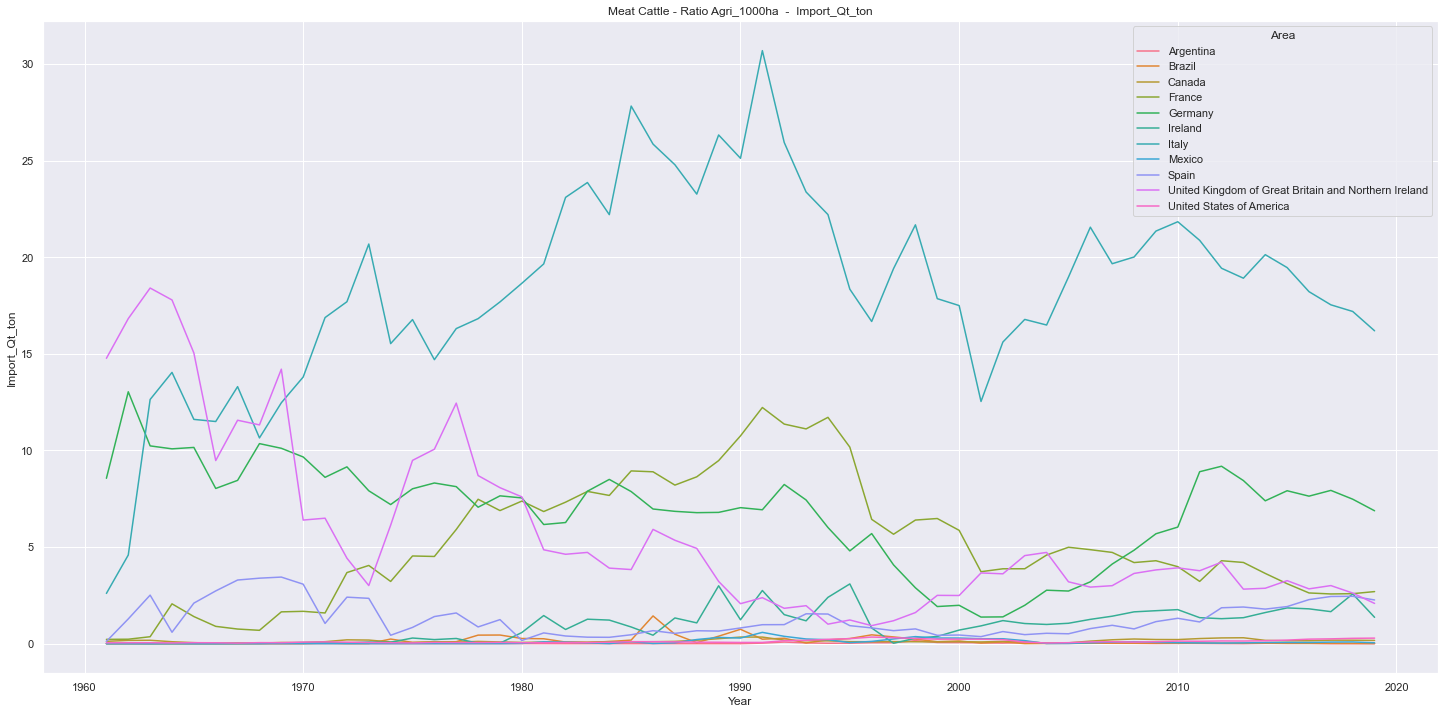

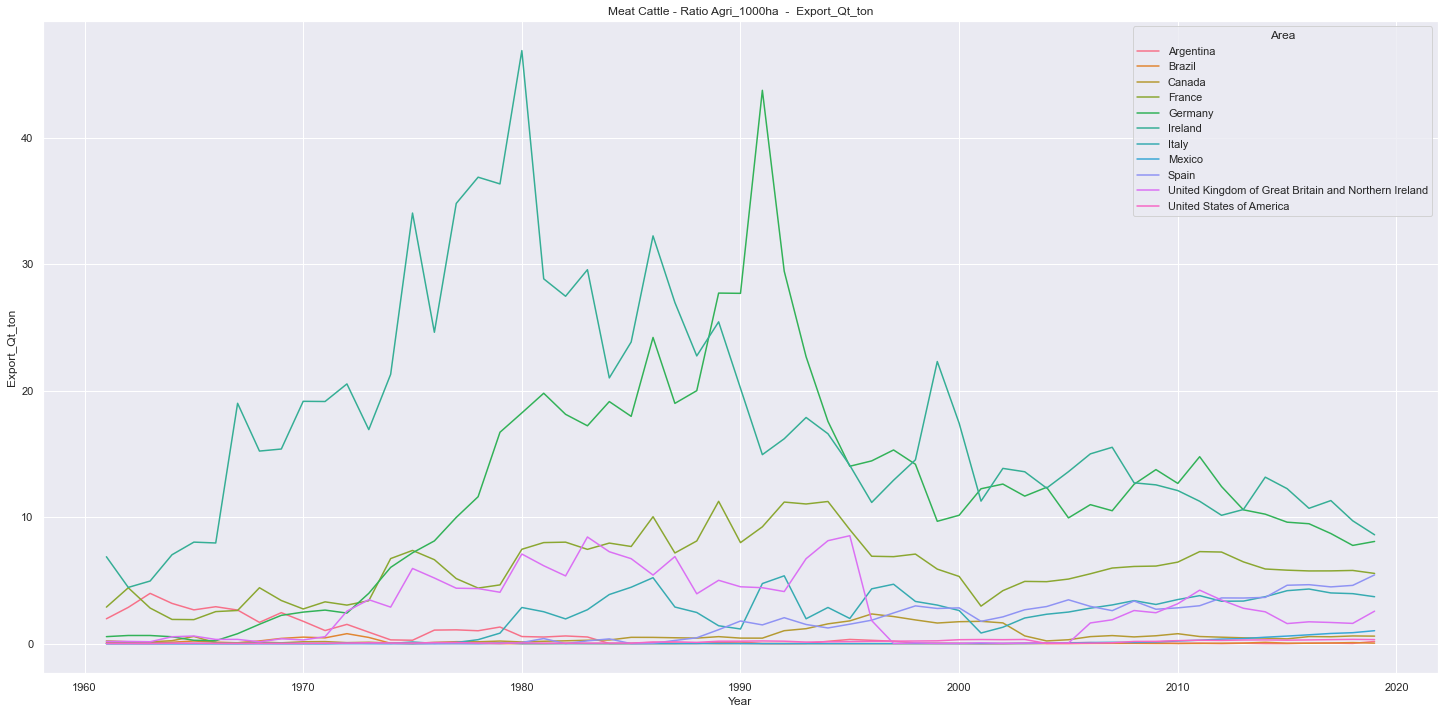

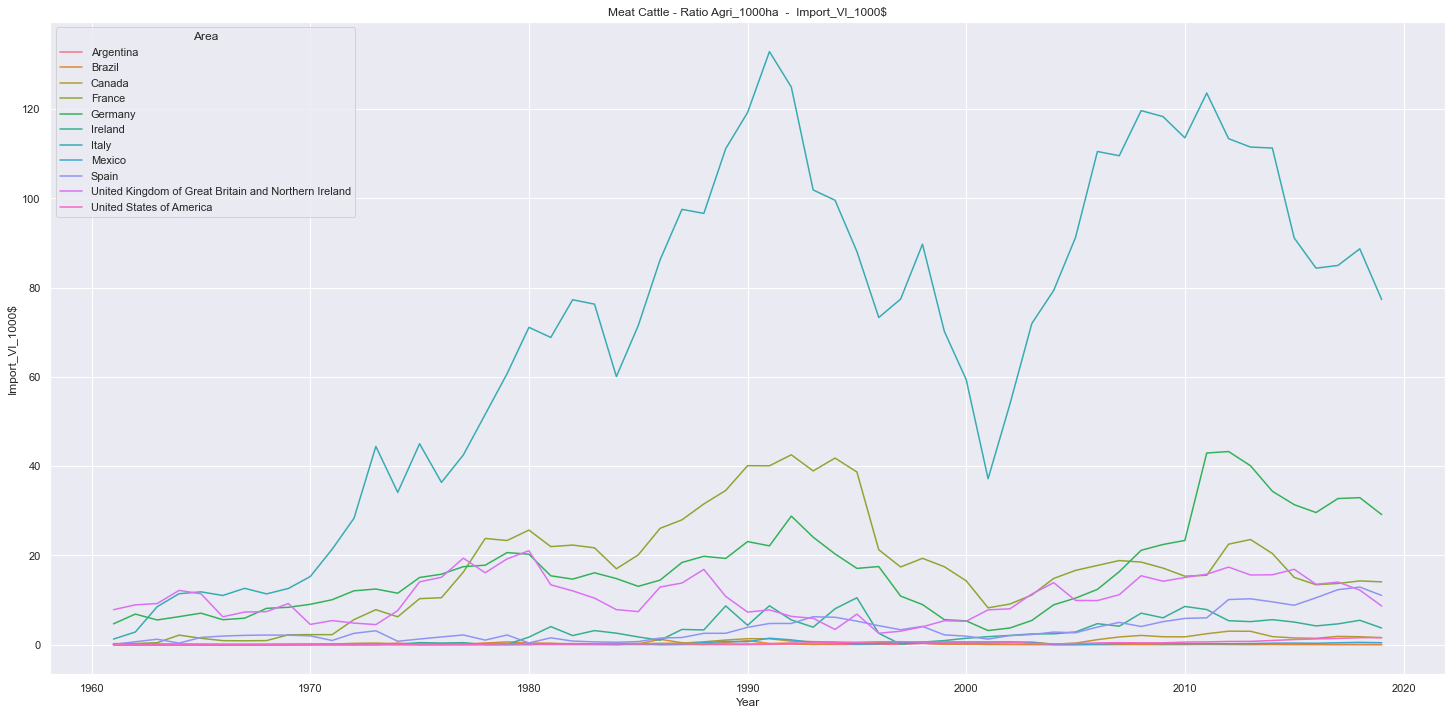

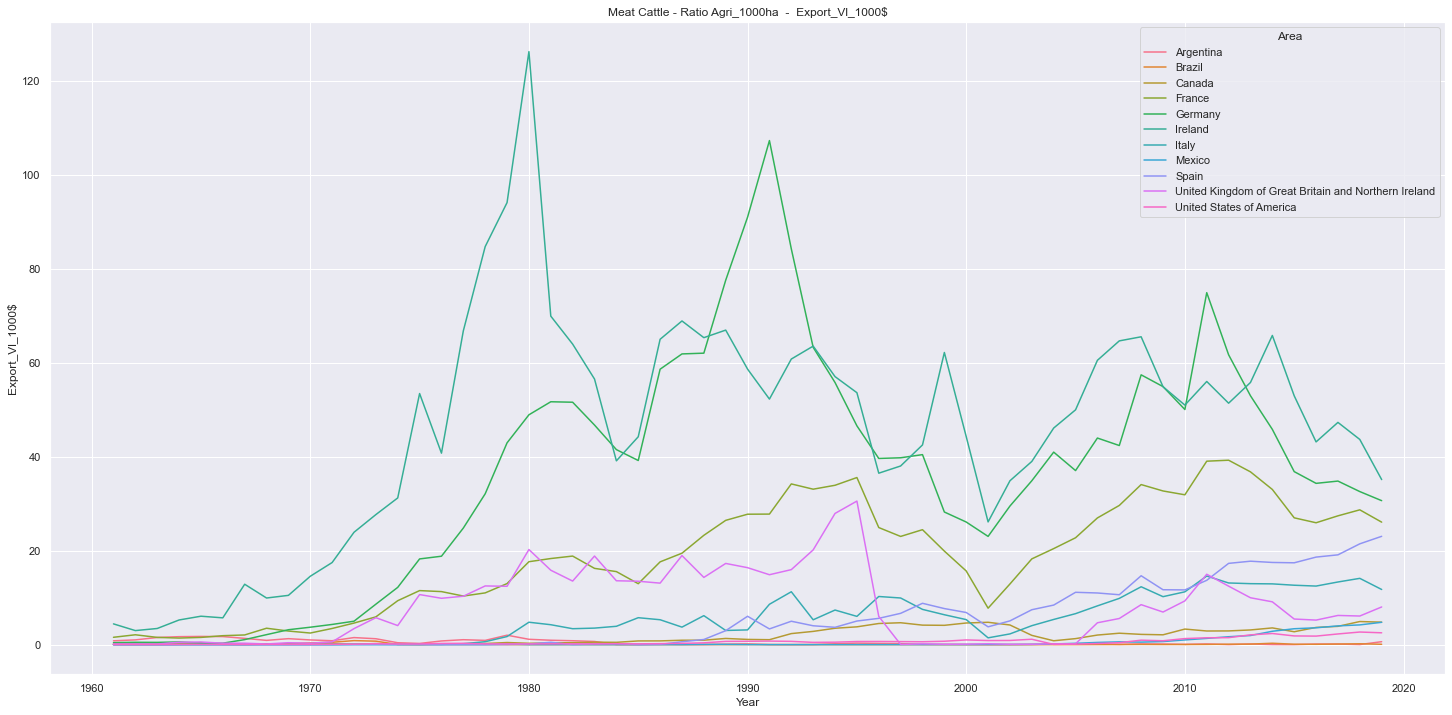

In [34]:
for col in columns_to_plot:
  #Filter by Trade Type and Product Type
  imp = ratio_df.loc[(trade_cl_vl_filled.Element == element)]
  imp.reset_index(inplace=True,drop=True)
  columns = ['Area', 'Year']
  columns.append(col)

  
  sns.set(rc = {'figure.figsize':(25,12)}) #Set figure size

  #Plot
  sns.lineplot(x='Year', y=col,hue="Area",
              data=ratio_df[columns], color="red" ).set_title("Meat Cattle - Ratio Agri_1000ha  -  {0}".format(col)) #Plot
  plt.show()